## **1. Business Problem Understanding**

### **Context**

Customer attrition, also known as customer churn, is the loss of clients or customers. It is a critical metric for industries that rely on long-term customer relationships, such as telecommunications, internet service providers, pay TV companies, insurance firms, and subscription-based services. These businesses prioritize customer retention because acquiring a new customer is significantly more expensive than keeping an existing one.

Telecommunication companies, in particular, depend on a stable and loyal customer base for sustained revenue and business growth. High churn rates can lead to substantial revenue losses and increased marketing costs to attract new customers. Therefore, understanding the factors that drive customer churn is essential. By analyzing churn patterns and predicting at-risk customers, companies can proactive measure to retain costumers, such as personalized offers, improved customer service, or targeted loyalty programs—to reduce churn and maximize long-term customer value.

### **Problem Statement**

Telecommunication companies face a highly competitive market where customer expectations are constantly evolving. With numerous service providers offering similar products, customers can easily switch to competitors if they experience poor service quality, high costs, or inadequate customer support.

One of the biggest challenges in the telecom industry is customer churn, where subscribers discontinue their services, leading to revenue loss and increased customer acquisition costs. High churn rates indicate dissatisfaction and can significantly impact a company’s financial health. Understanding the key drivers behind churn—whether it’s pricing, contract flexibility, service reliability, or customer engagement—is crucial for telecom companies to implement targeted retention strategies.

### **Objectives**

The primary objective of this project is to analyze customer churn data and develop a predictive model that can **identify customers who are most likely to leave**. By understanding the factors that drive churn, the project will explore **which features have the most significant impact** on customer retention and determine **the best-performing machine learning algorithm** for this task.

Customer churn poses a major financial challenge for telecom companies, as **acquiring a new customer is significantly more expensive than retaining an existing one**. Therefore, an effective churn prediction model will allow businesses to take **proactive measures** to:
- Improve customer experience and engagement.
- Optimize pricing strategies based on churn risk.
- Enhance service offerings to increase customer satisfaction and loyalty.

### **Metrics Evaluation**

In customer churn prediction, the primary goal is to **identify customers who are likely to leave** so that proactive retention strategies can be implemented. Given that acquiring a new customer is far more expensive than retaining an existing one, it makes sense to prioritize minimizing the number of **missed churners** (customers who leave without being identified as at risk).

Moreover, the dataset is **imbalanced**, with only **26.54% of customers churning** while **73.46% remain**. This means that traditional metrics like **Accuracy** are not reliable, as a model that always predicts "No Churn" could achieve ~73% accuracy without providing any real business value.

When making predictions, two types of errors can occur:

1. **Type I Error (False Positive)**
   - Happens when the model **incorrectly classifies a non-churner as a churner**.
   - **Business Impact:** The company **wastes retention resources** on customers who were never planning to leave.
   - **This affects Precision**, as a lower Precision means more false churn predictions.

2. **Type II Error (False Negative)**
   - Happens when the model **fails to identify an actual churner**.
   - **Business Impact:** The company **loses a customer without taking preventive action**, resulting in **lost revenue**.
   - **This affects Recall**, as a lower Recall means we miss real churners.


### **Optimization Metric Selection**
| **Metric**    | **What It Measures** | **Impact on Type I and II Errors** | **When to Use?** |
|--------------|---------------------|--------------------------------|-----------------|
| **Recall (Sensitivity)** | Measures how many actual churners we correctly identify. | Reduces Type II Errors (less missed churners). | Best for extreme churn prevention strategies. |
| **Precision** | Measures how many predicted churners actually churn. | Reduces Type I Errors (less false churn predictions). | Useful if retention costs are high. |
| **F1-Score** | Balances Recall and Precision. | Balances Type I and II Errors. | Good if Precision drops too much while optimizing Recall. |
| **F2-Score** | **Prioritizes Recall while still considering Precision.** | **Minimizes Type II Errors more than F1-Score.** | **Best for churn prediction where missing churners is very costly.** |
| **ROC-AUC** | Measures overall model performance. | Helps compare models but doesn’t impact business decisions. | Useful for model selection. |
| **Accuracy** | % of correct predictions. | Misleading due to class imbalance. | Not recommended. |


## **Final Decision: F2-Score**
While Recall alone ensures we **catch as many churners as possible**, it may lead to **too many false positives** (customers wrongly flagged as churn risks). Instead, the **F2-Score** is a better alternative because it **prioritizes Recall** while **still considering Precision**.

### **Priority 1: Optimize F2-Score (Minimize Type II Errors with Some Precision Consideration)**
- Ensures we **catch most churners** while **not completely ignoring false positives**.
- **Better balance than Recall alone**, as it prevents unnecessary retention efforts.

### **Priority 2: Adjust Decision Threshold to Fine-Tune Recall and Precision**
- Fine-tune the threshold to control **false positives** to account for the retention budget.


### **F2-Score Over F1-Score**
F1-score **equally balances Recall and Precision**, but in churn prediction, **Recall is more important**.  
F2-score **puts more weight on Recall**, making it the best choice when **missing a churner is more costly than mistakenly flagging a non-churner**.

### **Analytic Approach**

- Study the dataset to understand its structure and patterns.
- Prepare and clean the data to make it ready for building the model.
- Create new features to improve the model's predictions.
- Test different models and evaluate them using **F2-Score** as the main metric.
- Improve the best model by tuning its parameters.
- Find out which factors are most important for predicting if a customer will subscribe.

## **2. Data Understanding**

The Telco Customer Churn dataset consists of customer demographics, service subscriptions, account details, and churn status, aiming to identify factors influencing customer attrition. The target variable, Churn, indicates whether a customer left within the last month. Demographic information provides insights into customer profiles, while service-related features capture the types of subscriptions and additional services used. Account details include contract type, billing preferences, payment methods, and tenure, reflecting customer engagement and financial interactions. The detailed description of each variable will be explained below.

Data source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| CostumerID | Text |  |
| Gender | Text | Male or Female |
| SeniorCitizen | Float | Whether the customer is a senior citizen or not |
| Partner | Text | Whether customer has a partner or not (Yes, No) |
| Dependents | Text | Whether customer has dependents or not (Yes, No) |
| Tenure | Float | Number of months the customer has been with the company. |
| PhoneServices | Text | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Text | Whether the customer has multiple lines or not (Yes, No, No Phone Service) |
| InternetServices | Text | Customer’s internet service type (DSL, Fiber Optic, None) |
| OnlineSecurity | Text | Whether the customer has Online Security add-on (Yes, No, No Internet Service) |
| OnlineBackup | Text | Whether the customer has Online Backup add-on (Yes, No, No Internet Service) |
| DeviceProtection | Text | Whether the customer has Device Protection add-on (Yes, No, No Internet Service) |
| TechSupport | Text | Whether the customer has Tech Support add-on (Yes, No, No Internet Service) |
| StreamingTV | Text | Whether the customer has streaming TV or not (Yes, No, No Internet Service) |
| StreamingMovies | Text | Whether the customer has streaming movies or not (Yes, No, No Internet Service) |
| Contract | Text | Term of the customer’s contract (Monthly, 1-Year, 2-Year) |
| PaperlessBilling | Text | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | Text | The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card) |
| MonthlyCharges | Float | The monthly amount charged to the customer |
| TotalCharges | Float | The total amount charged to the customer over their tenure |
| Churn | Text | Whether the customer churned or not (Yes, No) |

### **Initialization**

In [ ]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering and Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Split Data and Hyperparameter Tunning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Model Evaluation
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, precision_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import shap

# Save Model
import pickle

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

### **Load Dataset**

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')

df.head()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Data Overview**

In [ ]:
# Fetching the number of rows & columns of the data set
print(f'Number of rows and columns in the df is {df.shape}')

Number of rows and columns in the df is (7043, 21)


In [ ]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)

,dataFeatures,dataType,null,unique,sample unique
0,customerID,object,0,7043,"[4815-GBTCD, 2782-JEEBU]"
1,gender,object,0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,2,"[1, 0]"
3,Partner,object,0,2,"[Yes, No]"
4,Dependents,object,0,2,"[Yes, No]"
5,tenure,int64,0,73,"[59, 42]"
6,PhoneService,object,0,2,"[No, Yes]"
7,MultipleLines,object,0,3,"[No, Yes]"
8,InternetService,object,0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,3,"[Yes, No]"


Based on the information above, we can observe the following:
* The dataset contains 7,043 entries (rows) and 21 attributes (variables or columns).
* The majority of the variables are categorical with a limited number of unique values.
* There no null values in the dataset, but _TotalCharges_ columns has wrong data type.

### **Remove Irrelevant Columns From Data Set**

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)

## **3. Data Cleaning**

Data cleaning aims to prepare the dataset for analysis by ensuring it is accurate, consistent, and complete, with an emphasis on addressing issues such as missing values, duplicates, outliers, and inconsistencies.

### **Check for Missing Values**

In [ ]:
# check data non numeric on TotalCharges column
x = df['TotalCharges']
str_count = 0
for i in x:
    try:
        a = float(i)
    except:
        print("String values = '{}'".format(i))
        str_count += 1

print("Total string: ", str_count)

String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
Total string:  11


Replace the 11 missing values, currently represented as ' ', with null values.

In [ ]:
# Replace ' ' to 0
df["TotalCharges"] = df["TotalCharges"].replace(' ', np.nan)

# Displaying the null values rows
missing_in_column = df[df["TotalCharges"].isnull()]
print(missing_in_column)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

We observed that all **NaN** values in `TotalCharges` correspond to a `Tenure` value of 0, which makes sense since a customer who has not been with the company would not have any billing.

In [ ]:
# Drop missing values in the TotalCharges variable
df.dropna(inplace=True)
df.shape

(7032, 20)

In [ ]:
# Confirm the total number of missing values after filling
df['TotalCharges'].isna().sum()

0

It is confimed that the `TotalCharges` no longer has missing values.

### **Convert the Data Type**

In [ ]:
# Change TotalCharges column type to float
df['TotalCharges'] = df['TotalCharges'].astype(float)
df = df.reset_index()[df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### **Check for Duplicate Entries**

In [ ]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 22


In [ ]:
# View the actual duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
961     Male              0      No         No       1          Yes   
1334    Male              0      No         No       1          Yes   
1486  Female              0      No         No       1          Yes   
1734    Male              0      No         No       1          Yes   
1927    Male              0      No         No       1          Yes   
2708    Male              0      No         No       1          Yes   
2887    Male              0      No         No       1          Yes   
3296  Female              1      No         No       1          Yes   
3748    Male              0      No         No       1          Yes   
4091    Male              0      No         No       1          Yes   
4468  Female              0      No         No       1          Yes   
5497    Male              0      No         No       1          Yes   
5727    Male              0      No         No       1          Yes   
5750  

There is no actual duplicated row in this dataset.

### **Check for Outliers for Numerical Variables**

In [ ]:
# List of numeric variables
numeric_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

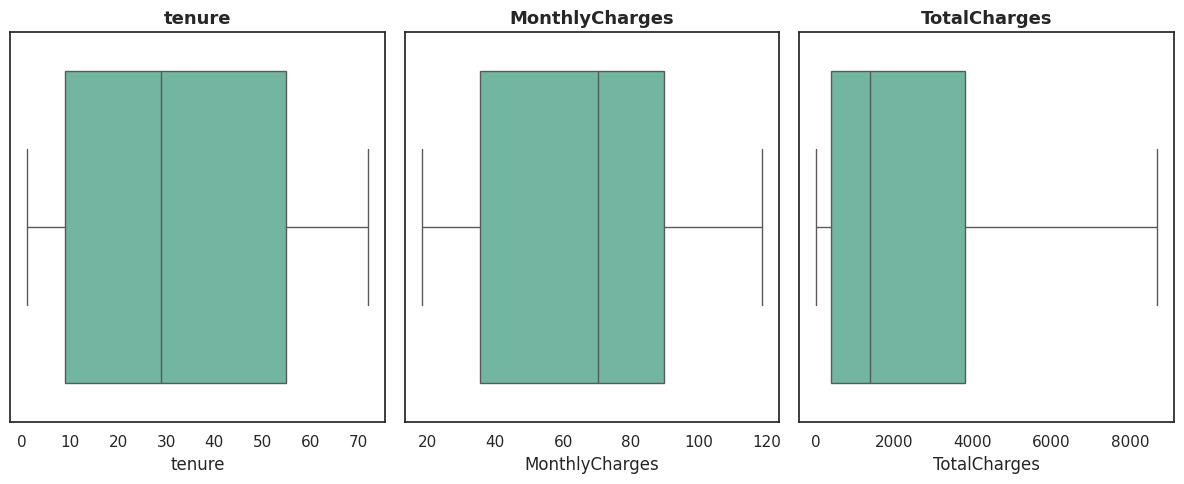

In [ ]:
plt.figure(figsize=(12, 5), facecolor='white')
sns.set(style='white', palette='Set2')
plotnumber = 1

for feature in numeric_vars:
    ax = plt.subplot(1,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=13, fontweight='bold')
    plt.tight_layout()
    plotnumber += 1

The boxplots indicate that none of the numerical variables contain outliers.

## **4. Explanatory Data Analysis (EDA)**

The goal of EDA is to comprehend the data by uncovering patterns, relationships, and trends, as well as formulating hypotheses for further analysis. It emphasizes visualizations, summary statistics, and correlations to extract meaningful insights from the dataset.

### **Descriptive Statistics**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The table above shows no anomalies in the data.

### **Distribution of Target Variable**

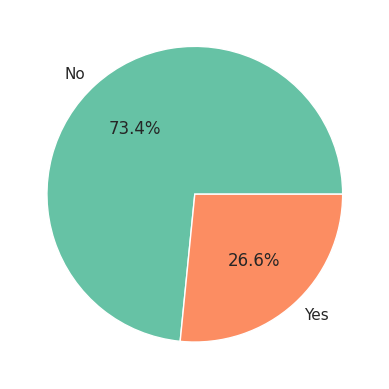

In [ ]:
plt.pie(df["Churn"].value_counts(),labels=df["Churn"].unique(), autopct='%.1f%%')
plt.show()

Distribution data:
- Not-churn: 73.4%
- Churn: 26.6%

The data is clearly imbalanced, highlighting the need for appropriate handling techniques  to ensure the model accurately predicts customer churn. We will conduct a deeper analysis of the data to understand the distribution of features, identify any hidden patterns, and explore potential correlations that may impact customer churn.

### **Customer Churn by Demographic**

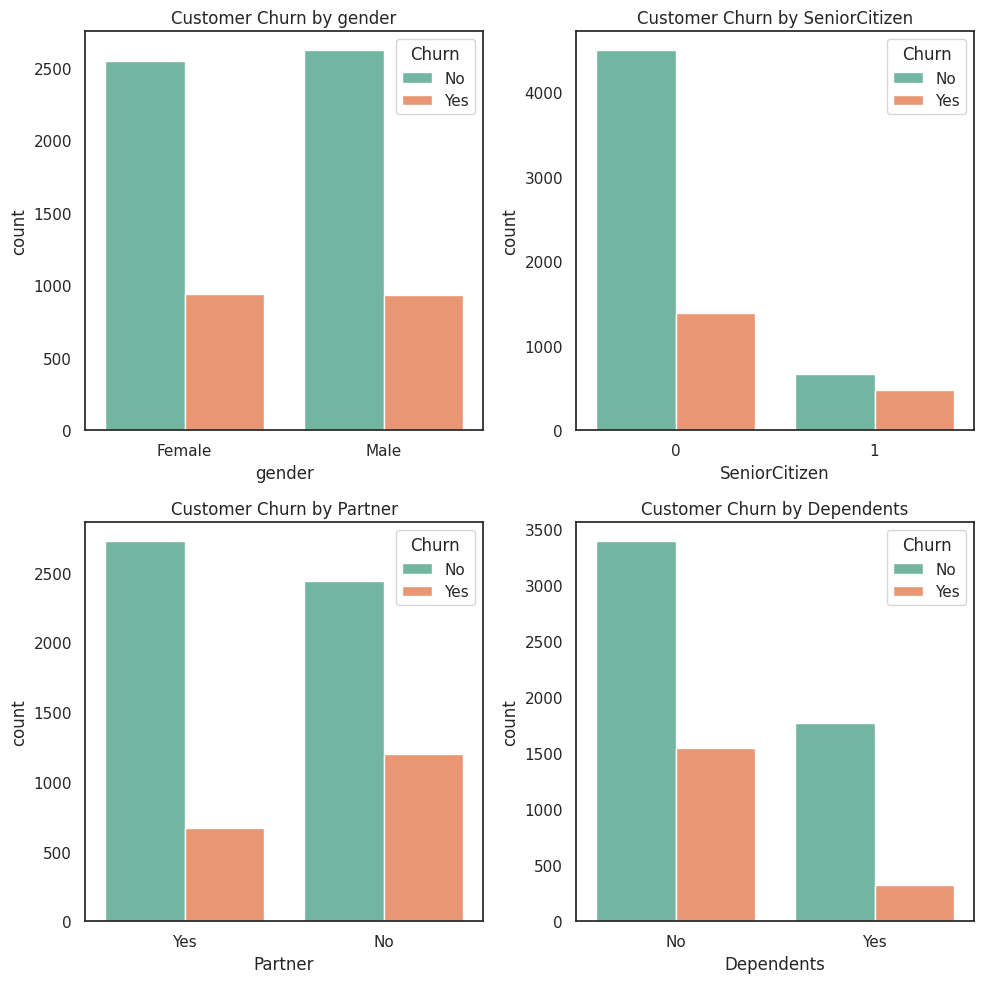

In [ ]:
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(10, 10))

for i, col in enumerate(demographic_cols):
    plt.subplot(2, 2, i+1)

    # Plot countplot
    ax = sns.countplot(x=col, hue="Churn", data=df)
    plt.title("Customer Churn by " + col)

plt.tight_layout()
plt.show()

From the plots above, we can observe the following:
- `gender`: Both male and female customers churn at similar rates, indicating that gender does not significantly impact customer retention.This suggests that gender is not a strong predictor of churn, and it may not contribute significantly to the model.
- `SeniorCitizen`: Senior citizens have a higher churn rate compared to non-senior customers. This indicates that age is a relevant factor, and older customers may be more likely to discontinue their service.
- `Partner`: Customers without a partner churn at a higher rate compared to those with a partner. This suggests that individuals living alone may have less loyalty or lower service dependency, making them more likely to switch providers.
- `Dependents`: Customers with dependents churn less frequently than those without dependents. This implies that family responsibilities may contribute to service stability, as customers with dependents might rely more on telecom services.

### **Customer Churn by Customer Account Information**

Customer account information includes details about customer tenure, which indicates how long they have been with the company, as well as their contract type, payment method, and paperless billing preferences. It also includes financial aspects such as monthly charges and total charges, which provide insights into customer spending patterns and potential correlations with churn.

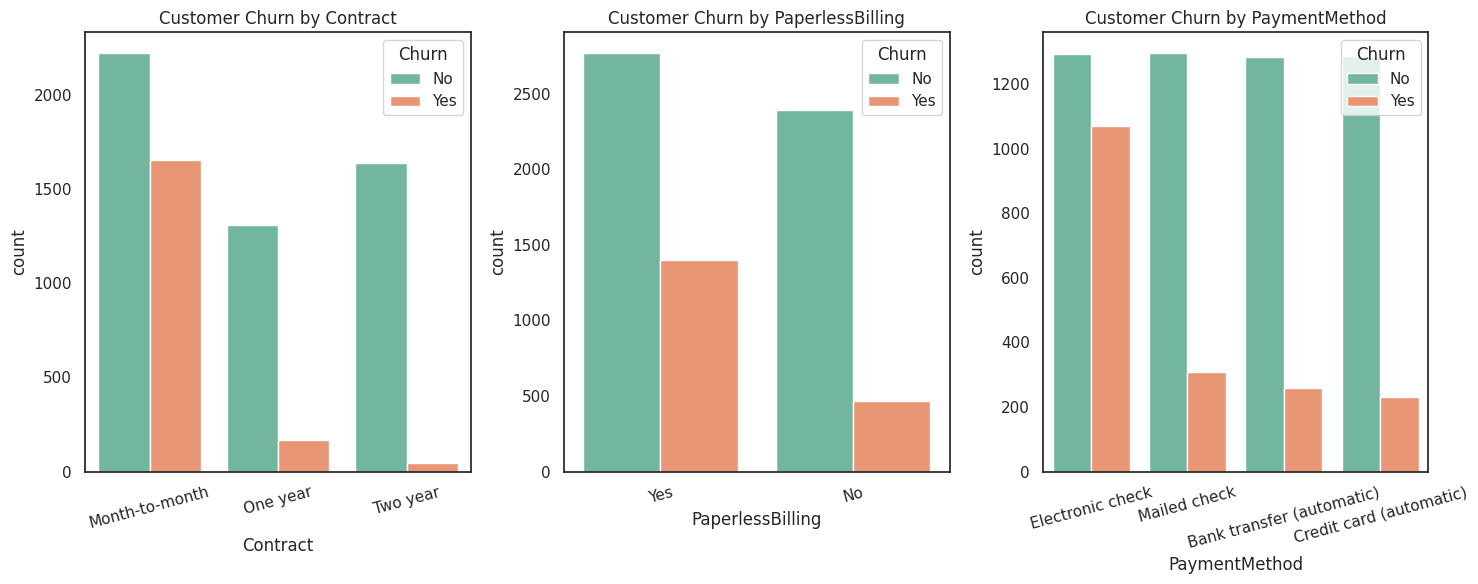

In [ ]:
# Prepare the data for plotting
acc_info_cat = ["Contract", "PaperlessBilling", "PaymentMethod"]
acc_info_num = ["MonthlyCharges", "TotalCharges"]

# Create the barplot
plt.figure(figsize=(15, 6))

for i in range(3):
    # plot the graph
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=acc_info_cat[i], hue="Churn", data=df)
    plt.xticks(rotation=15)
    plt.title("Customer Churn by " + acc_info_cat[i])

plt.tight_layout()
plt.show()

The visualizations highlight how contract types, paperless billing preferences, and payment methods influence customer churn:
- `Contract`: ustomers with month-to-month contracts leave the company more often, likely because they have more flexibility to switch providers. In contrast, those with one-year or two-year contracts are much less likely to churn, showing that long-term contracts help retain customers.
- `PaperlessBilling`: Customers who use paperless billing tend to leave at a higher rate than those who receive paper bills. This may be because digital users find it easier to switch providers, while those using traditional billing may be less likely to change services.
- `PaymentMethod`: Customers who pay via electronic checks have the highest churn rate, possibly due to financial issues or lower commitment. On the other hand, customers using automatic payments (bank transfer or credit card) are less likely to leave, likely because automated billing makes it easier to stay subscribed.

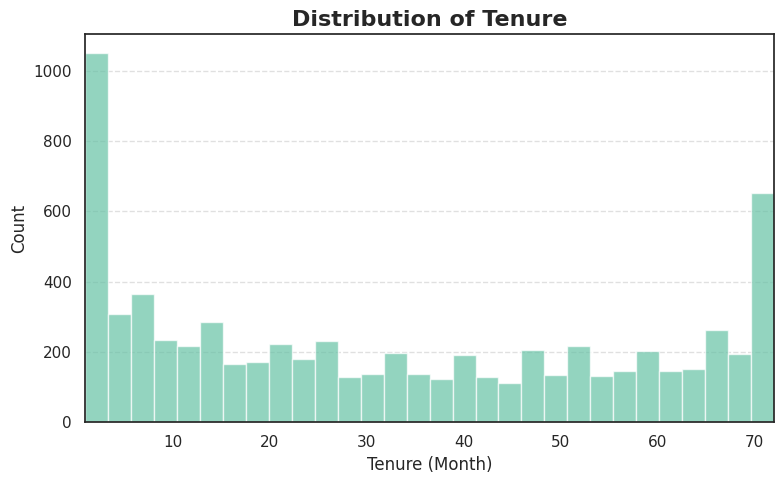

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["tenure"], bins=30,  alpha=0.7)

plt.title("Distribution of Tenure", fontsize=16, fontweight="bold")
plt.xlabel("Tenure (Month)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlim(df["tenure"].min(), df["tenure"].max())
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The `tenure` data will then be grouped into 5 classes with 12-month intervals since it aligns with typical contract lengths, helps balance the distribution, and allows for better analysis of churn trends.

In [ ]:
# Change Tenure column to categorical
def tenure_categorical(df):
    if df["tenure"] <= 12 :
        return "1-12 months"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "13-24 months"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "25-48 months"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "49-60 months"
    elif df["tenure"] > 60 :
        return "61-72 months"

df["tenure_group"] = df.apply(lambda x: tenure_categorical(x), axis = 1)

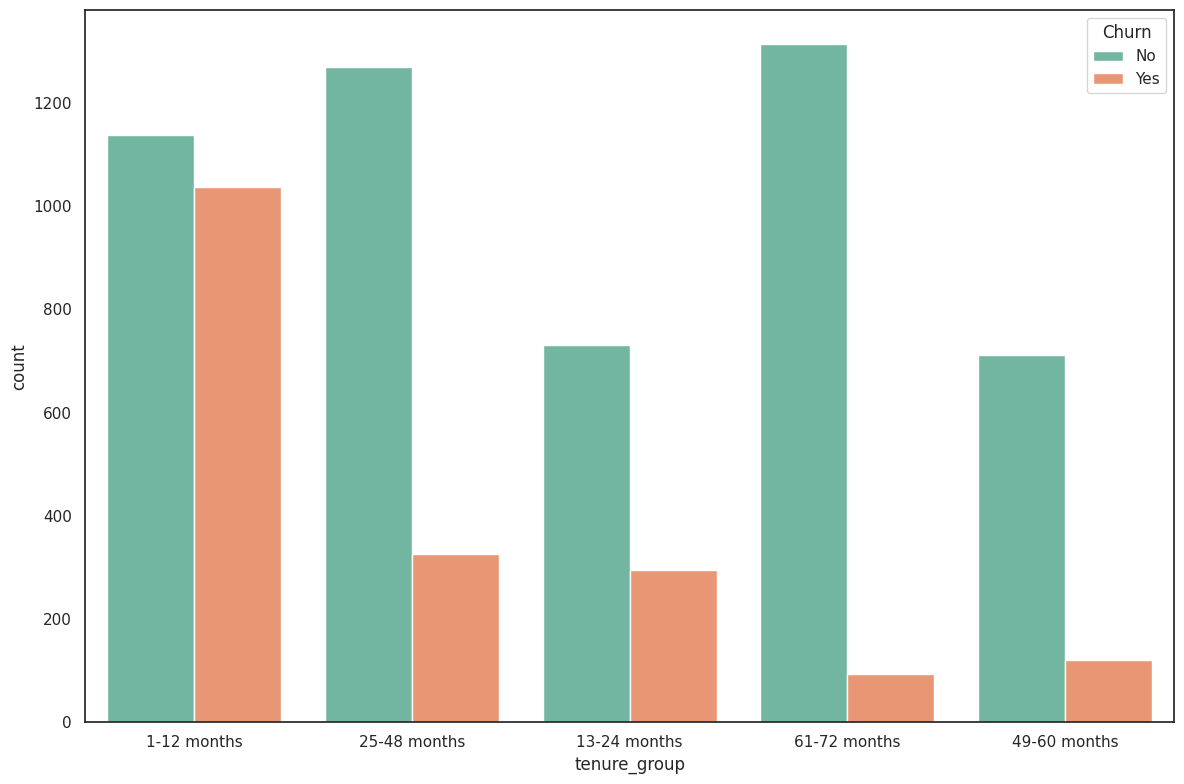

In [ ]:
# Plot the bar
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='tenure_group', data=df, hue='Churn')

plt.tight_layout()
plt.show()

Following are some key takeaways from the above graph:
- Customers who have been with the company for 1-12 months have the highest churn rate compared to other tenure groups. This suggests that new customers are more likely to discontinue services early, possibly due to unmet expectations or dissatisfaction.
- Customers with longer tenures (25-48 months, 49-60 months, and 61-72 months) have significantly lower churn rates. This indicates that customer loyalty increases over time, and long-term customers are more likely to stay.
- The churn rate drops considerably after 12 months, implying that if a company can retain customers for at least a year, they are more likely to stay long-term.

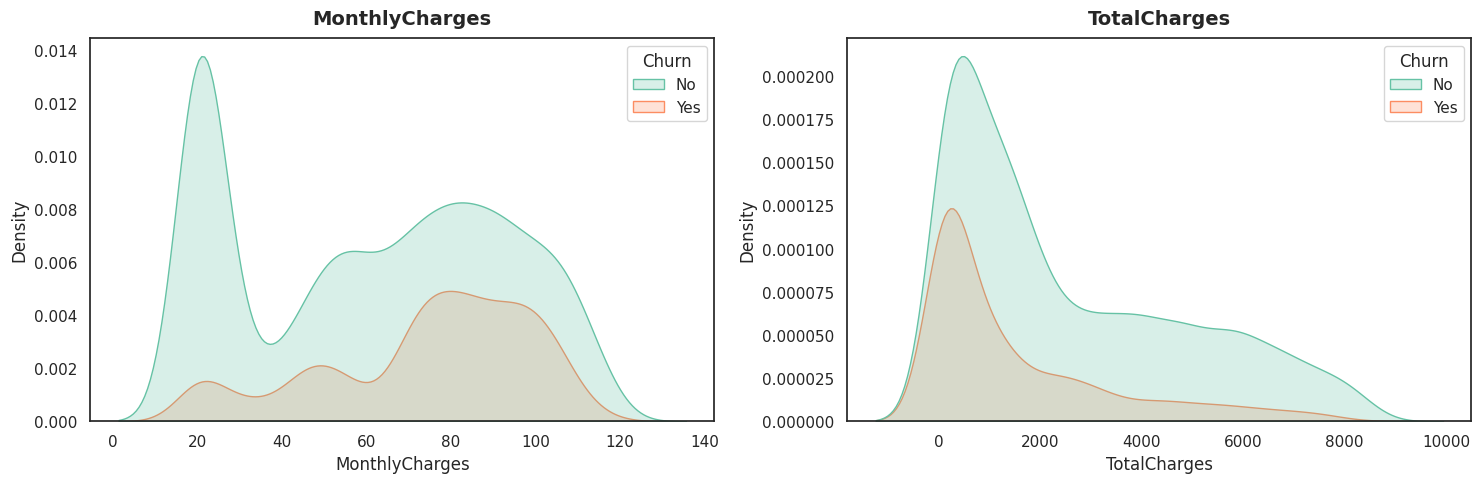

In [ ]:
colors = ['#66c2a5', '#fc8d62']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loop through each feature and plot
for ax, column, color in zip(axes, acc_info_num, colors):
    sns.kdeplot(data=df, x=column, hue='Churn', fill=True, ax=ax, palette=colors)
    ax.set_title(column, fontsize=14, pad=10, fontweight="bold")

plt.tight_layout()
plt.show()

Following are some key takeaways from the above graphs:

`MonthlyCharges` :
- Customers with lower monthly charges (~$20–$30) are mostly non-churners, indicating that budget-conscious customers are more likely to stay.
- Customers with higher monthly charges (~$70–$100) show a higher churn rate, suggesting that expensive plans may lead to dissatisfaction.
- The churned customers are more evenly spread across mid-to-high price ranges, meaning churn risk increases as monthly charges rise.

`TotalCharges` :
- Churned customers tend to have lower total charges, indicating that many who left were relatively new customers with shorter tenures or had fewer service add-ons.
- Customers with higher total charges (above ~$4000) are much less likely to churn, reinforcing the idea that longer-tenured customers or have multiple bundled services are more loyal.

<ipython-input-51-10d39d6a6ca9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=palette, ax=axes[0])
<ipython-input-51-10d39d6a6ca9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette=palette, ax=axes[1])


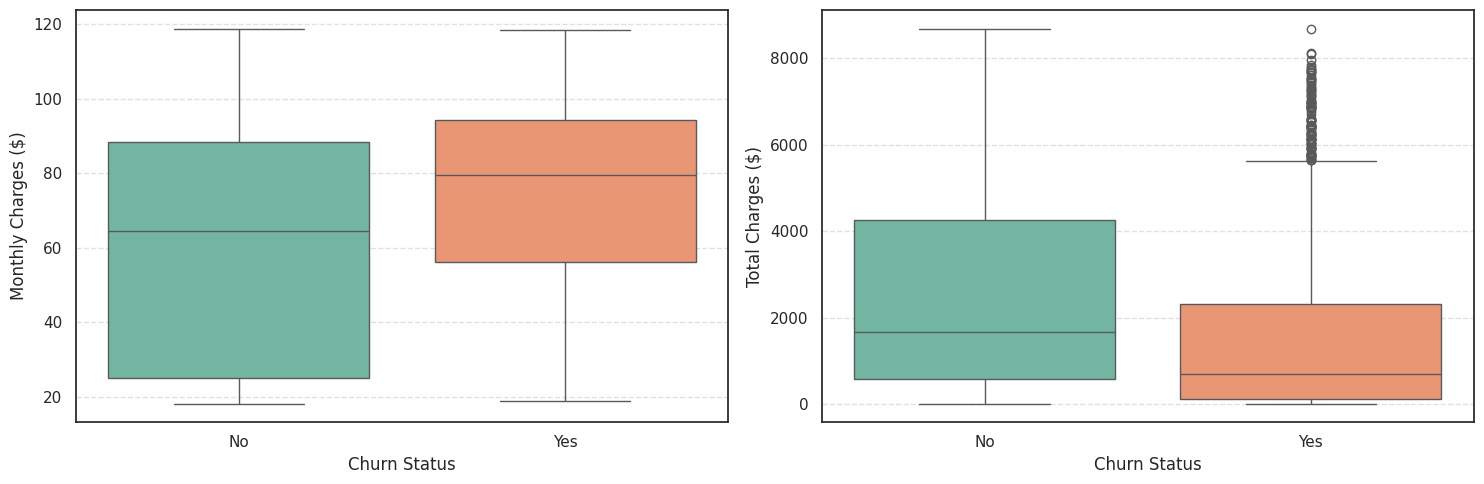

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
palette = {'No': '#66c2a5', 'Yes': '#fc8d62'}

# Monthly Charges Boxplot
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=palette, ax=axes[0])
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Total Charges Boxplot
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette=palette, ax=axes[1])
axes[1].set_xlabel('Churn Status', fontsize=12)
axes[1].set_ylabel('Total Charges ($)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

`MonthlyCharges` :
- Churned customers generally have higher monthly charges compared to non-churned customers.
- The median monthly charge for churned customers is higher, suggesting that customers paying more may be at greater risk of leaving.
- The spread (interquartile range) of churned customers is wider, indicating more variability in their monthly charges.

`TotalCharges` :
- Churned customers generally have lower total charges compared to those who stayed.
- The median total charge for churned customers is significantly lower, suggesting that customers with lower total spending tend to leave more often.
- There are many outliers in the churned group, indicating that some high-paying customers also churn, though they are fewer in number.

**The churn rate noticeably rises once monthly charges go beyond \$60. To gain
deeper insights, we will analyze customers with monthly charges over \$60 separately.**

In [ ]:
less_than_60=df[df['MonthlyCharges']<60]
grt_than_60=df[df['MonthlyCharges']>60]

# Select object and category columns (regular categorical)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Select numerical columns that contain only 0 and 1 (binary categorical)
binary_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() == 2]

# Combine both lists
all_categorical_cols = categorical_cols + binary_cols
all_categorical_cols=all_categorical_cols[1:]

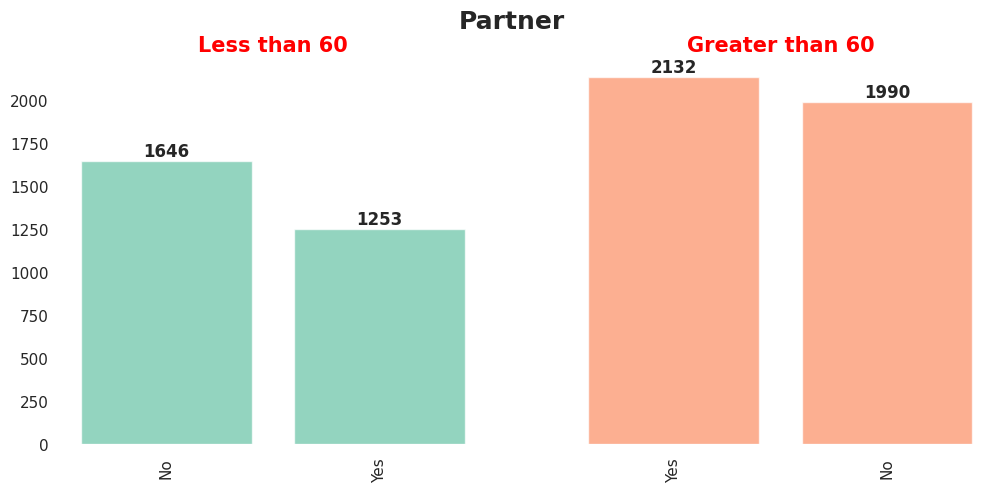

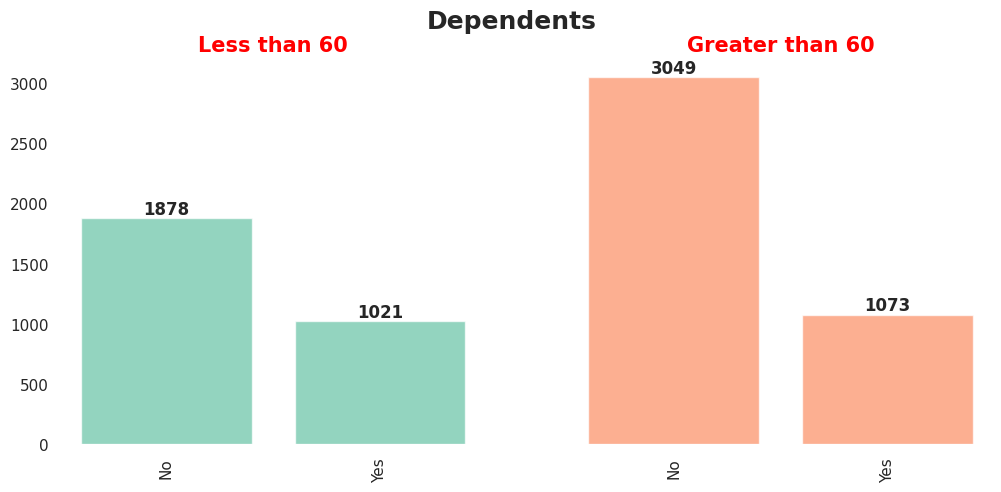

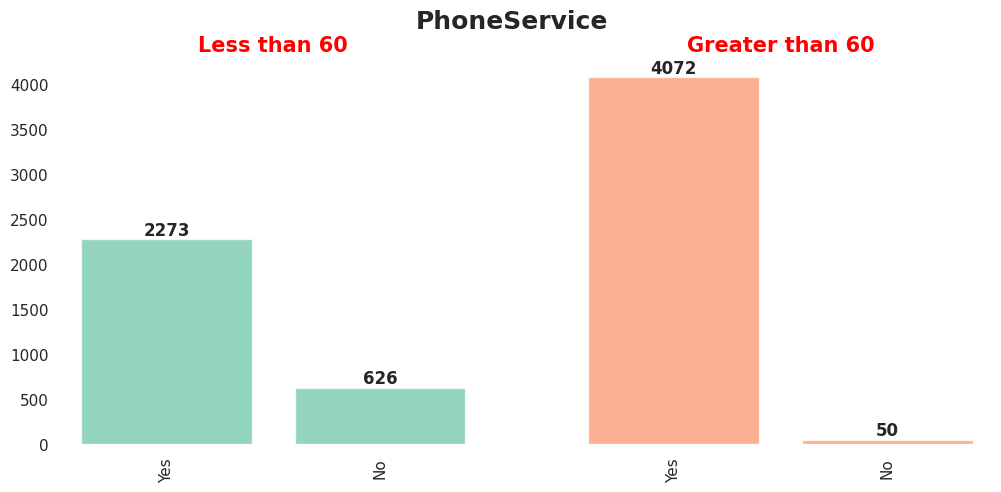

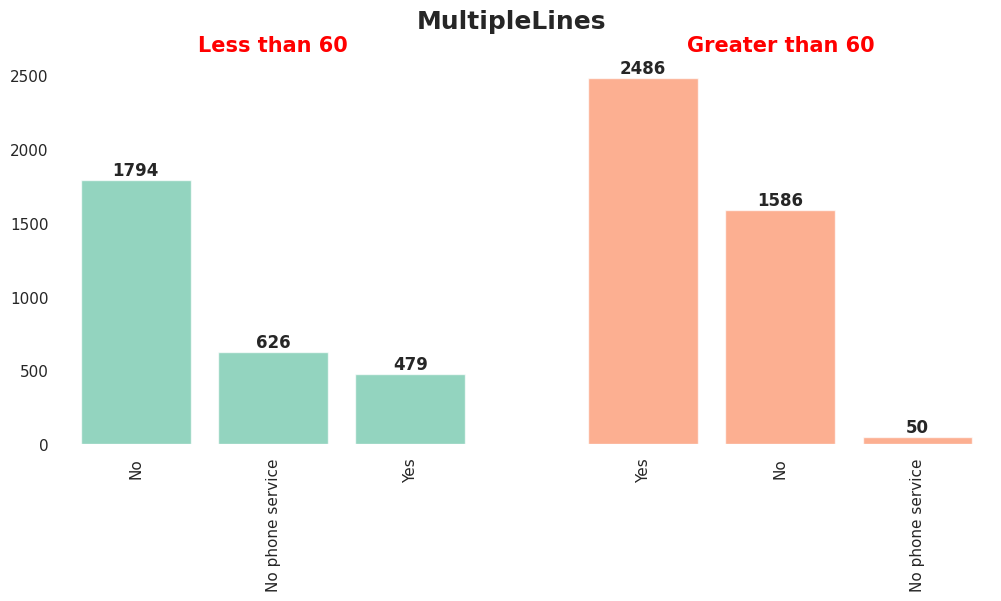

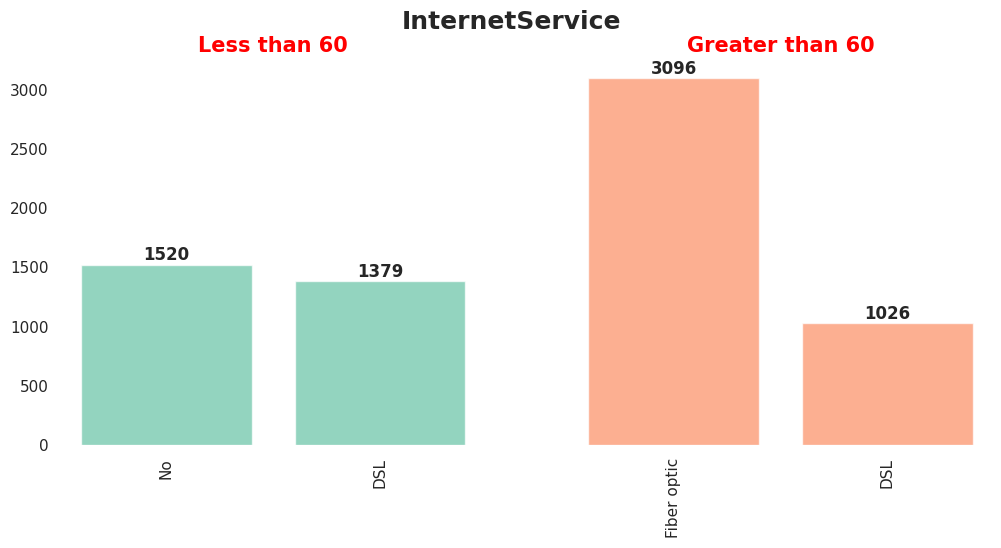

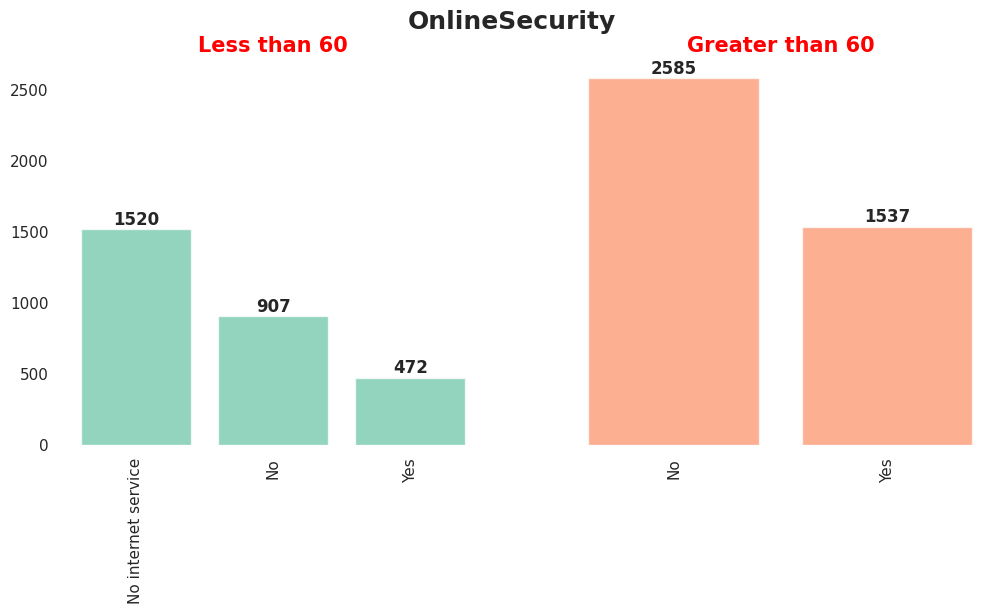

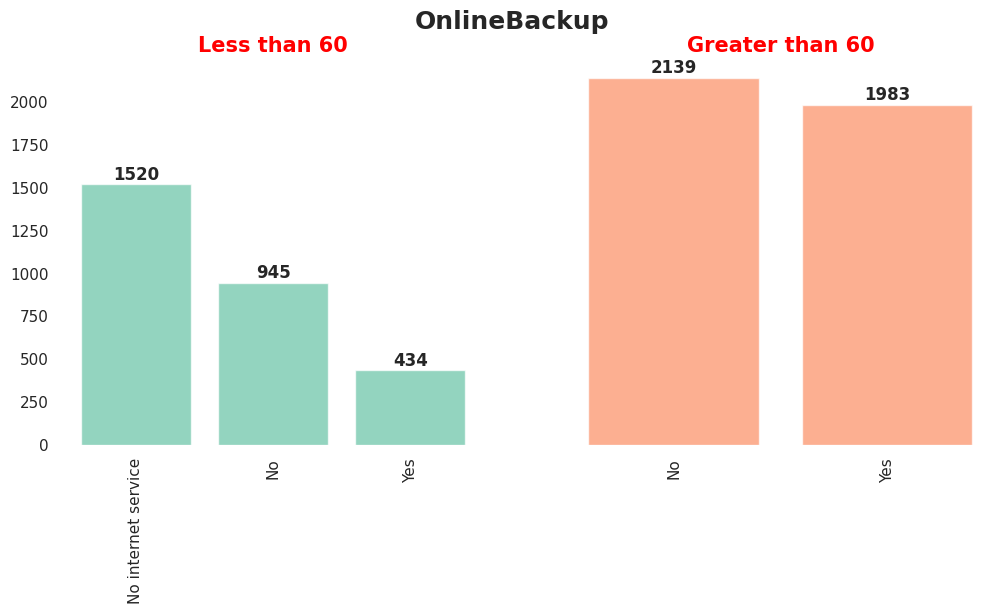

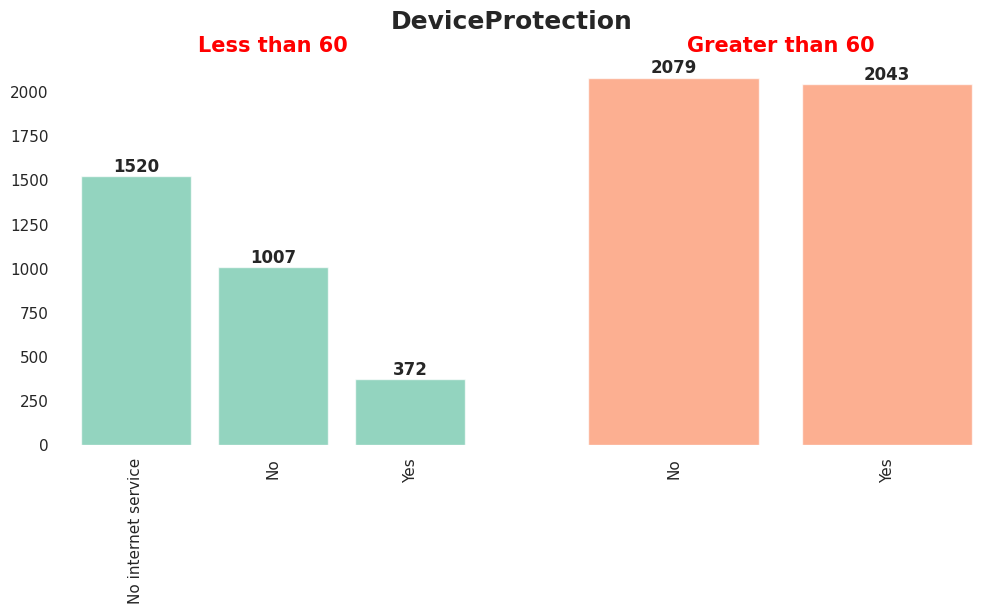

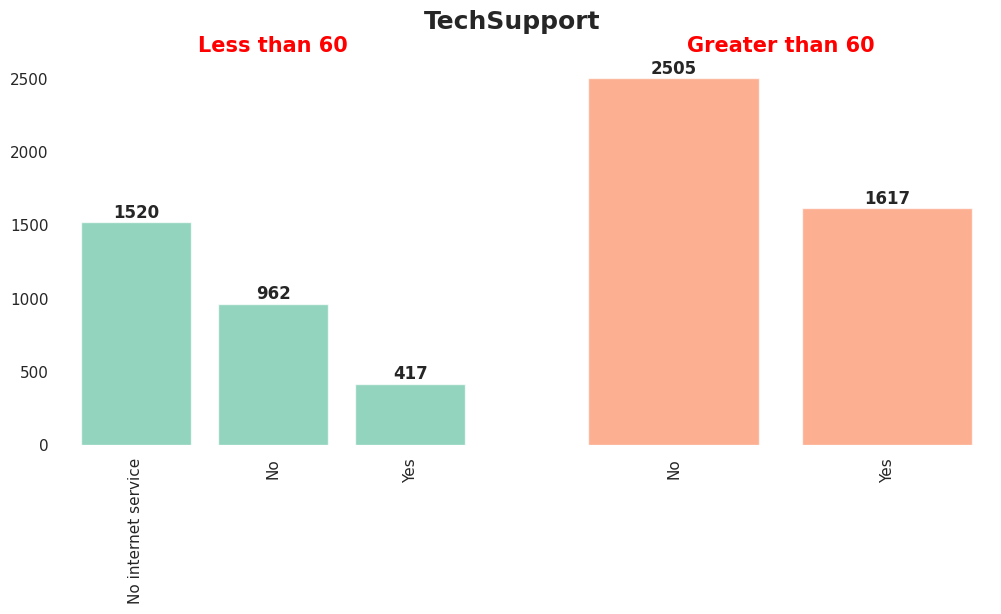

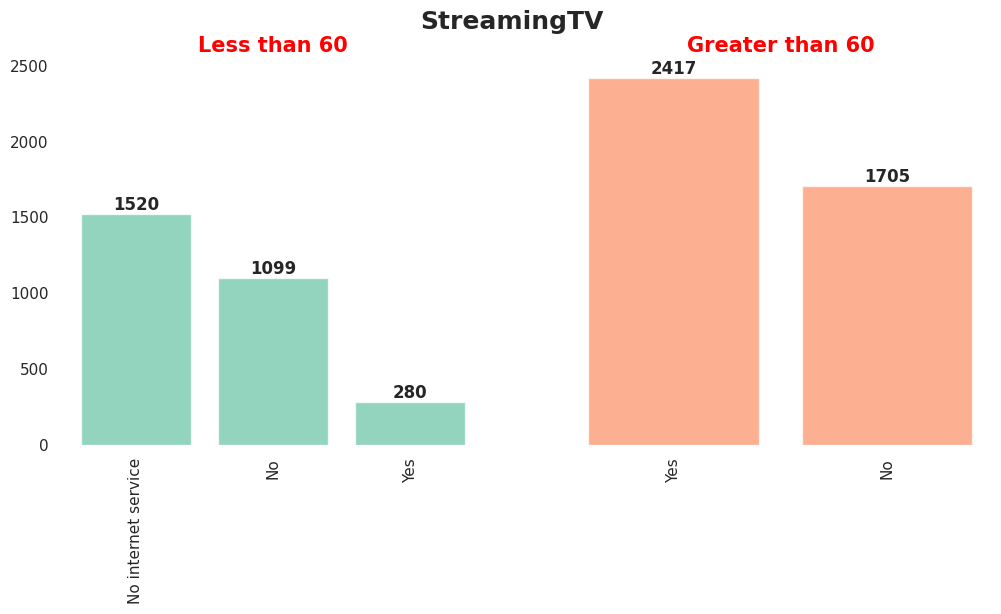

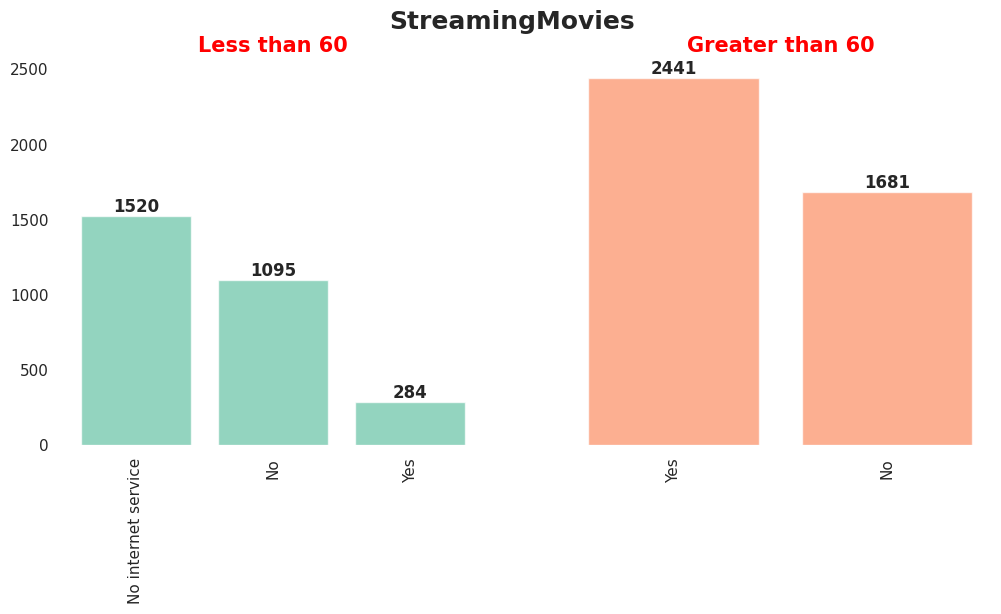

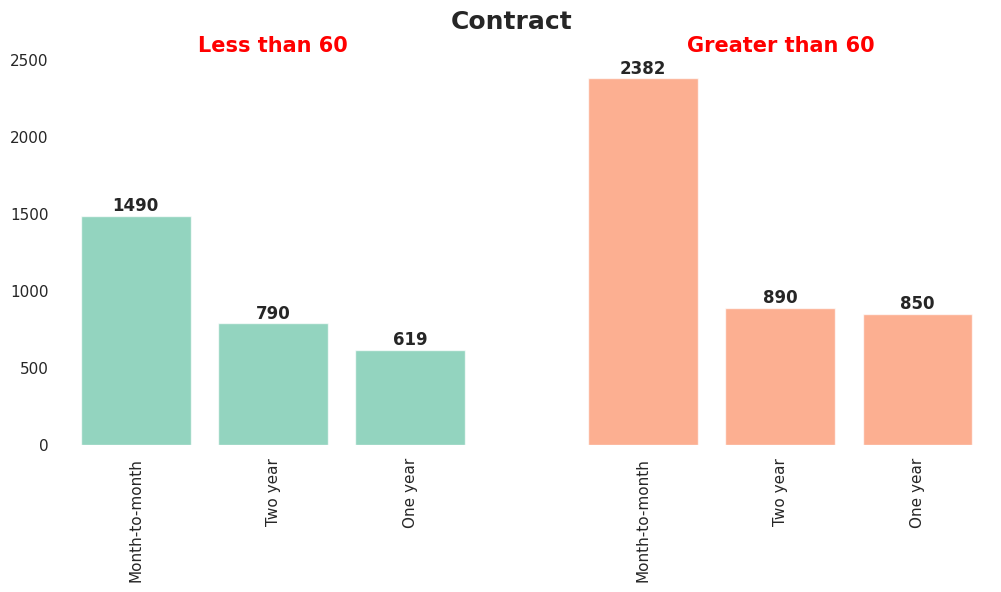

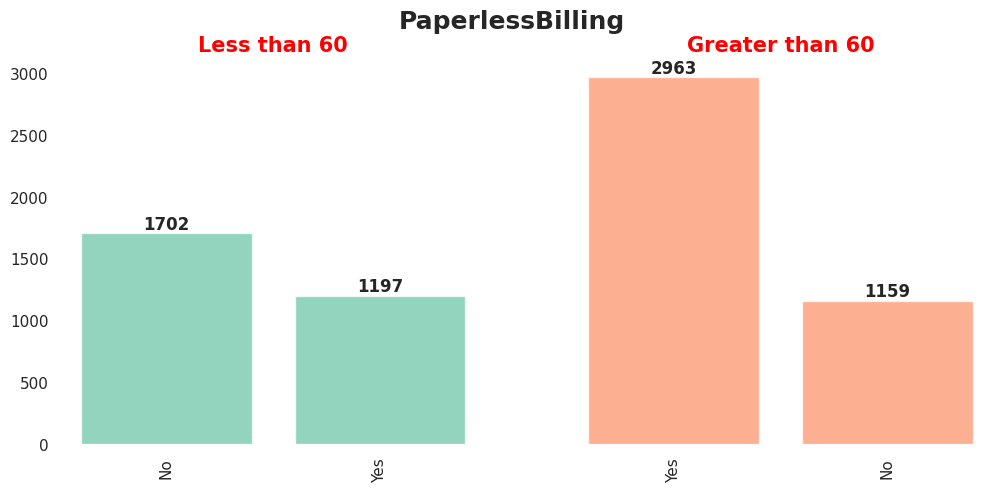

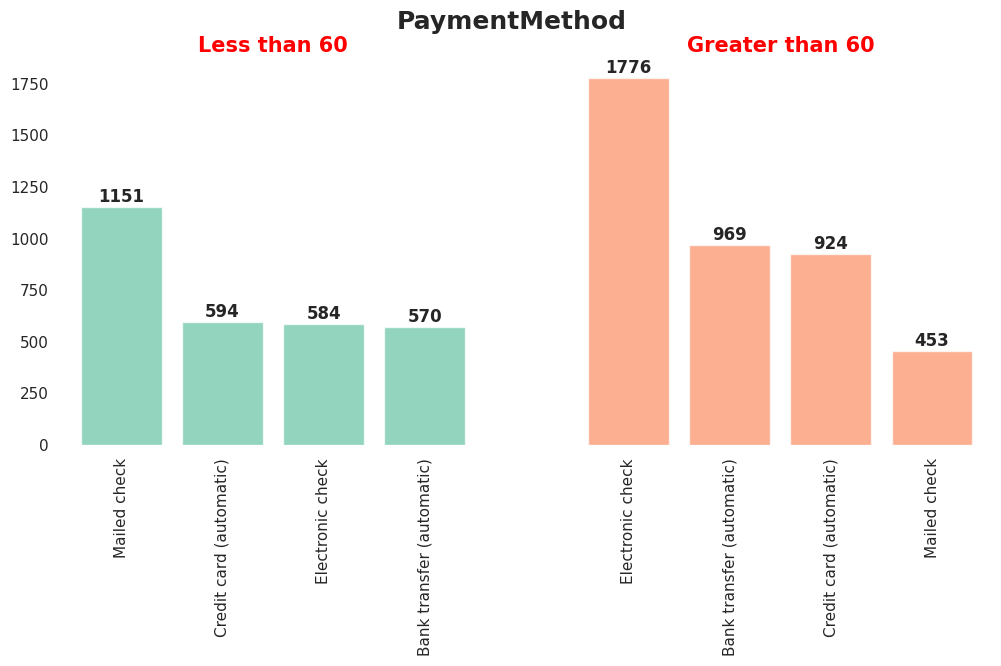

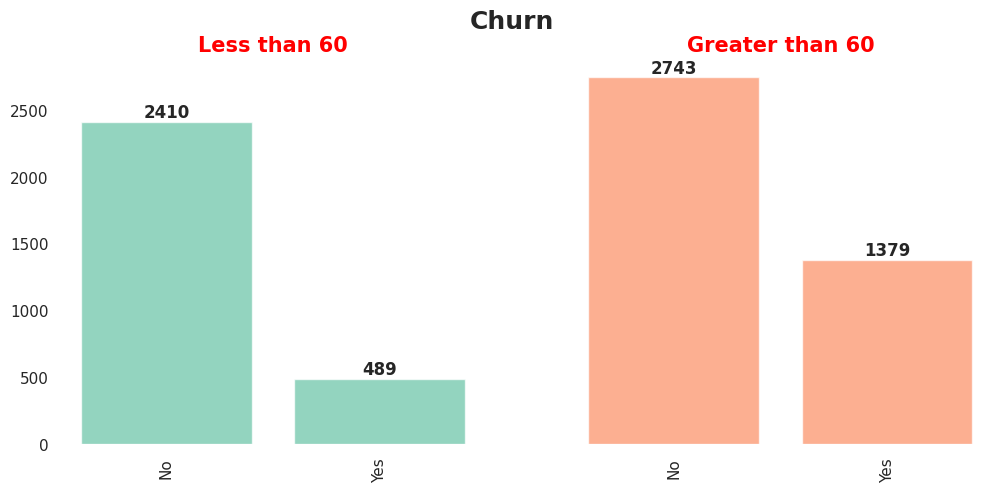

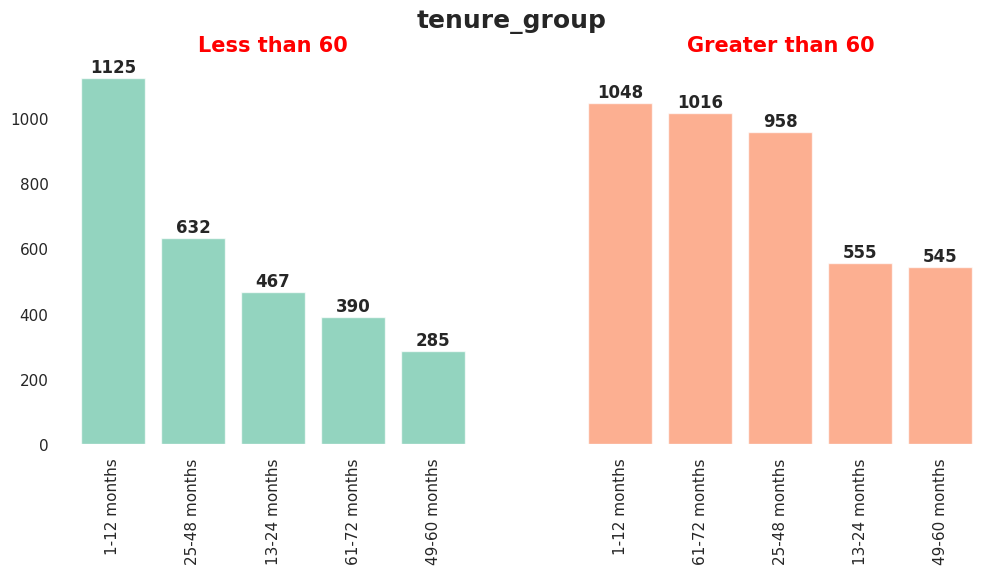

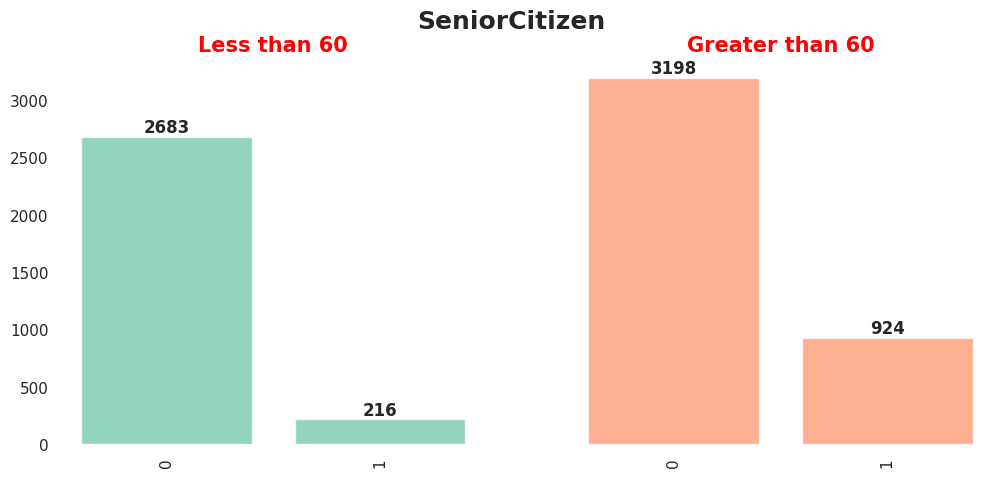

In [ ]:
for column in all_categorical_cols:
    # Count occurrences of each category
    contract_60_less = less_than_60[column].value_counts().reset_index()
    contract_60_less.columns = [column, 'count']

    contract_60_grt = grt_than_60[column].value_counts().reset_index()
    contract_60_grt.columns = [column, 'count']

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

    # First bar plot
    axes[0].bar(contract_60_less[column], contract_60_less['count'], color='#66c2a5', alpha=0.7)
    axes[0].set_title("Less than 60", fontweight='black', fontsize=15, color='red')

    # Second bar plot
    axes[1].bar(contract_60_grt[column], contract_60_grt['count'], color='#fc8d62', alpha=0.7)
    axes[1].set_title("Greater than 60", fontweight='black', fontsize=15, color='red')

    # Remove spines
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Add text above bars
    for i, j in zip(contract_60_less[column], contract_60_less['count']):
        axes[0].text(i, j + 5, f"{j}", ha='center', va='bottom', fontsize=12, fontweight='bold')

    for i, j in zip(contract_60_grt[column], contract_60_grt['count']):
        axes[1].text(i, j + 5, f"{j}", ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Vertical alignment
    axes[0].set_xticks(range(len(contract_60_less[column])))
    axes[0].set_xticklabels(contract_60_less[column], rotation=90, ha='center')

    axes[1].set_xticks(range(len(contract_60_grt[column])))
    axes[1].set_xticklabels(contract_60_grt[column], rotation=90, ha='center')

    fig.suptitle(column, fontweight='black', fontsize=18)
    plt.show()

- Customers with monthly charges above \$60 are more likely to use internet and phone services, yet churn increases in this group, which is a concern for the company. Efforts should be made to reduce churn in this segment.
- Fiber optic service is highly used among high-paying customers, but churn is also high, suggesting the need for a service quality review.
- Multiple lines are more common in the \$60+ group, indicating that customers with higher phone service usage might be at risk of churn.
- Payment method preferences shift as monthly charges increase, with electronic checks and bank transfers becoming more common, which could indicate different financial behaviors.
- Most customers paying over $60 are on month-to-month contracts, whereas one-year and two-year contract users remain stable across price ranges. This highlights the need to encourage long-term contracts to reduce churn.

<Figure size 1000x600 with 0 Axes>

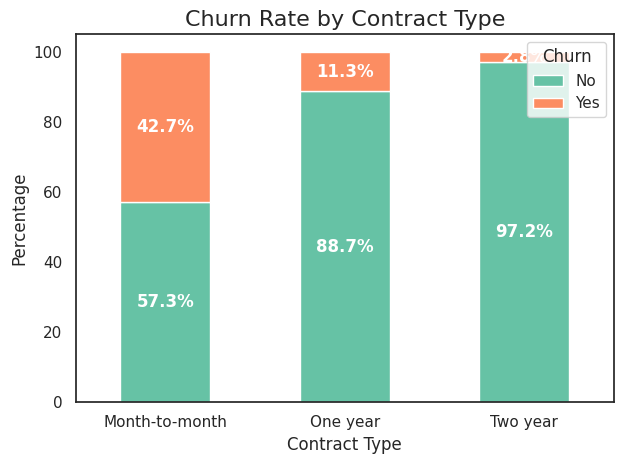

In [ ]:
# Calculate churn rates for each contract type
churn_rates = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = churn_rates.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])

# Add percentage labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white', fontweight='bold')

plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
# Filter for two-year contracts
two_year_contracts = df[df['Contract'] == 'Two year']

# Group by tenure_binned and calculate churn rate
churn_rate_by_tenure = two_year_contracts.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100

# Display the churn rates
churn_rate_by_tenure


Churn,No,Yes
tenure_group,,
1-12 months,100.000000,NaN
13-24 months,100.000000,NaN
25-48 months,97.810219,2.189781
49-60 months,96.028881,3.971119
61-72 months,96.855984,3.144016


The churn rate for two-year contract is very low. In fact, it is 0% churn for tenure 1-24 months, and only 2-4% for the rest. So regularization (L1) will be applied to Logistic Regression models.

### **Customer Churn by Services that Each Customer Has Signed Up For**

Services that each customer has signed up for include *Phone Service*, *Multiple Lines*, *Internet Service (DSL, Fiber Optic, or None)*, *Online Security*, *Online Backup*, *Device Protection*, *Tech Support*, *Streaming TV*, and *Streaming Movies*. These features provide insights into customer preferences and service usage, which can help in identifying patterns related to customer churn.

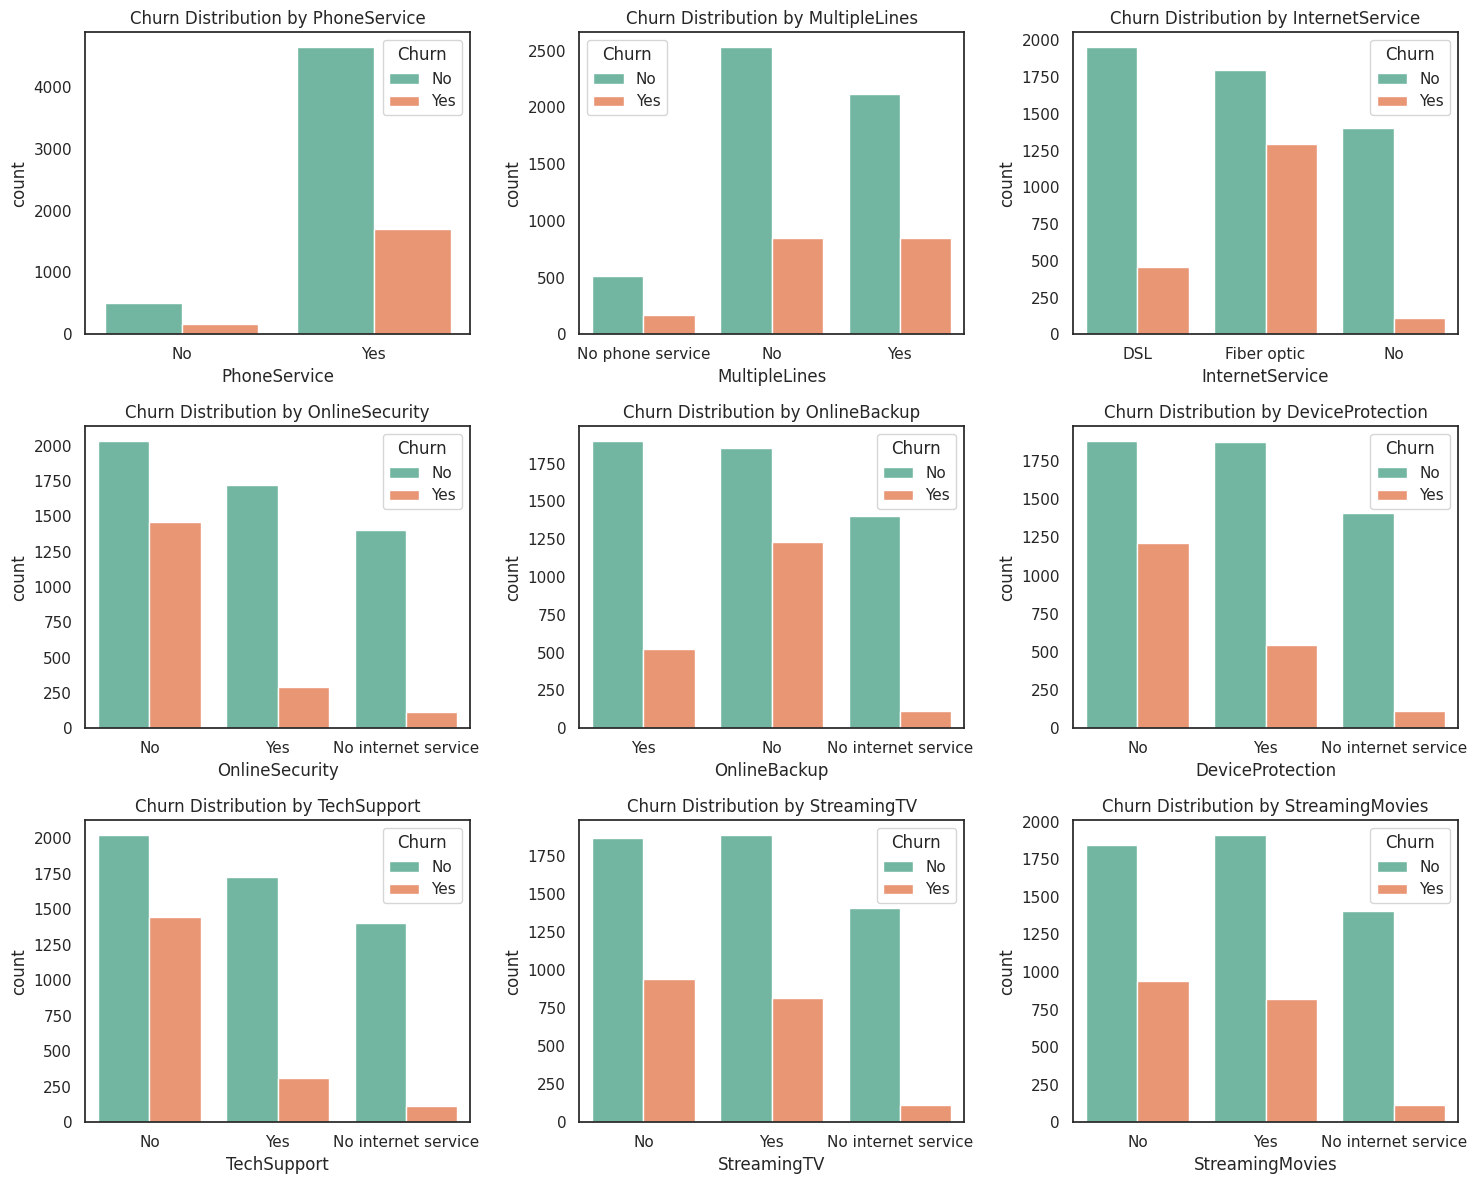

In [ ]:
# Prepare the data for plotting
service_cols = [
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Create the barplot
plt.figure(figsize=(15, 12))

for i, col in enumerate(service_cols):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn Distribution by {col}")

plt.tight_layout()
plt.show()

From the graphs above, following are some key takewayas:
- `PhoneService` : Customers who have phone service make up the majority of the dataset, and while some still churn, their churn rate is lower compared to those who do not have phone service. However, since very few customers do not have phone service, their churn rate is harder to compare meaningfully.
- `MultipleLines` : Customers with multiple lines churn slightly more than those with a single line, suggesting that having multiple lines does not necessarily improve retention.
- `InternetService` : Fiber optic users have the highest churn rate, while DSL users churn less. Customers with no internet service have the lowest churn, likely because they rely on phone services instead.
- `OnlineSecurity` : Customers without online security services churn more, suggesting that having security features may contribute to customer retention.
- `OnlineBackup` : A similar trend is observed where customers without online backup churn more, indicating that backup services may help reduce churn.
- `DeviceProtetcion` : Customers who do not have device protection churn at a higher rate, suggesting that this service might be valuable for retaining customers.
- `TechSupport` : The absence of tech support is strongly linked to higher churn, highlighting the importance of customer support in retention.
- `StreamingTV` : Customers without streaming TV services churn more, indicating that entertainment services might play a role in customer satisfaction.
- `StreamingMovies` : A similar trend is seen for streaming movies, where customers without this service have a higher churn rate, reinforcing the idea that bundled entertainment options may help reduce churn.

In this dataset, certain variables such as “OnlineSecurity,” “StreamingTV,” and others include values like “No internet service” or “No phone service,” while there are also main variables like “PhoneService” and “InternetService.” Therefore, we want to examine the relationships between these variables to determine whether it is more appropriate to merge them into a unified “No” category or to keep them as separate values.

#### **No Phone Service**

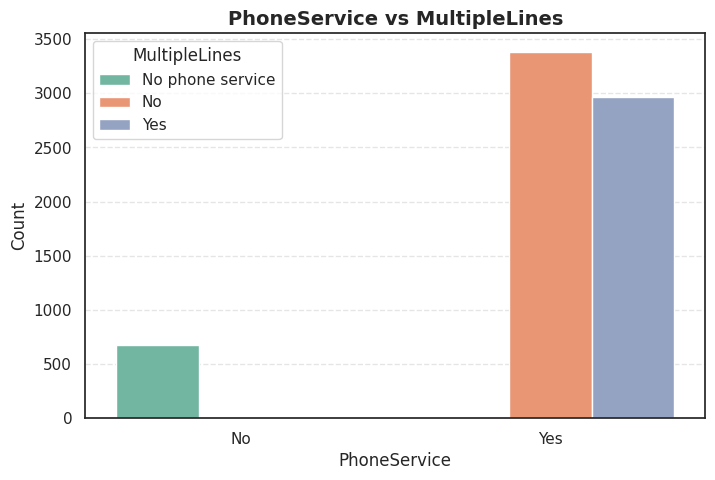

In [ ]:
# PhoneService vs MultipleLines
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PhoneService', hue='MultipleLines', palette='Set2')
plt.title('PhoneService vs MultipleLines', fontsize=14, fontweight='bold')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='MultipleLines')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **No Internet Service**

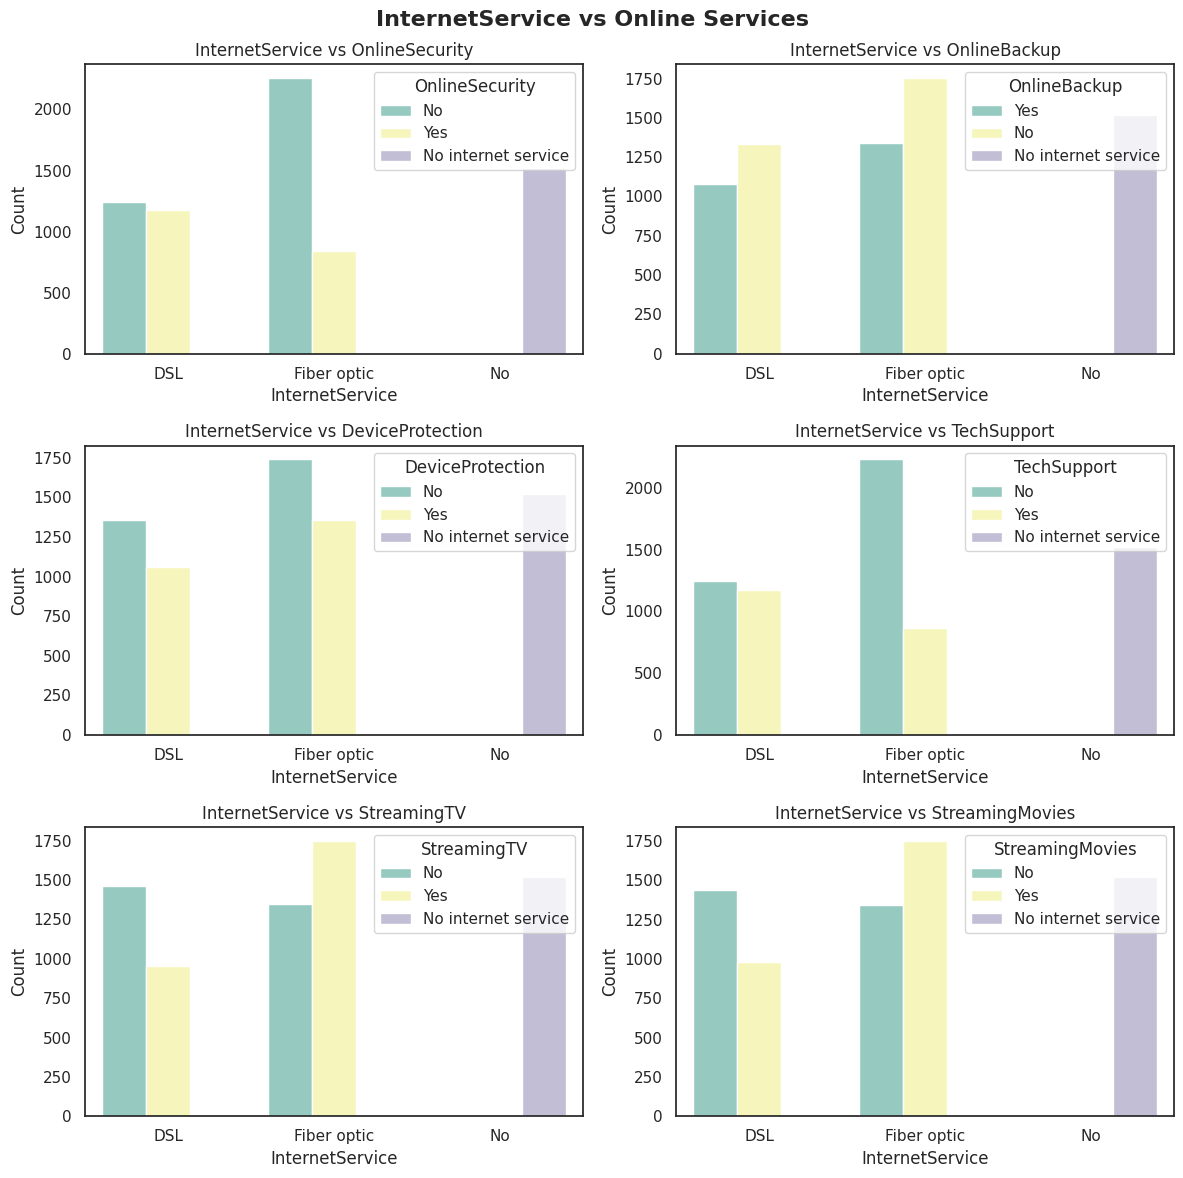

In [ ]:
online_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('InternetService vs Online Services', fontsize=16, fontweight='bold')

for ax, service in zip(axes.flatten(), online_services):
    sns.countplot(data=df, x='InternetService', hue=service, ax=ax, palette='Set3')
    ax.set_title(f'InternetService vs {service}')
    ax.set_xlabel('InternetService')
    ax.set_ylabel('Count')
    ax.legend(title=service)

plt.tight_layout()
plt.show()

After closer examination, it becomes clear that:
- If PhoneService is “No,” then MultipleLines will also be “No phone service.”
- If InternetService is “No,” then features like OnlineSecurity, StreamingTV, and others will be marked as “No internet service.”

To simplify the dataset and improve model interpretability, these “No internet service” or “No phone service” values are merged into a unified “No” category. This approach ensures consistency, reduces redundancy, and avoids unnecessary complexity in model training. The merged values also provide a clearer understanding of service adoption across customers without losing any essential information.

In [ ]:
#Replacing 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service','No phone service'], 'No', inplace=True)

### **Feature Correlation**

In [ ]:
df.drop(['tenure_group'], axis=1, inplace=True)

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
             'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_dummies = df.copy()
df_dummies[binary_cols] = df_dummies[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

<ipython-input-85-9d4eee47684a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dummies[binary_cols] = df_dummies[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df_dummies = pd.get_dummies(df_dummies, drop_first=True)  # Avoids multicollinearity
corr_wrt_churn = df_dummies.corr()["Churn"].sort_values(ascending=False)

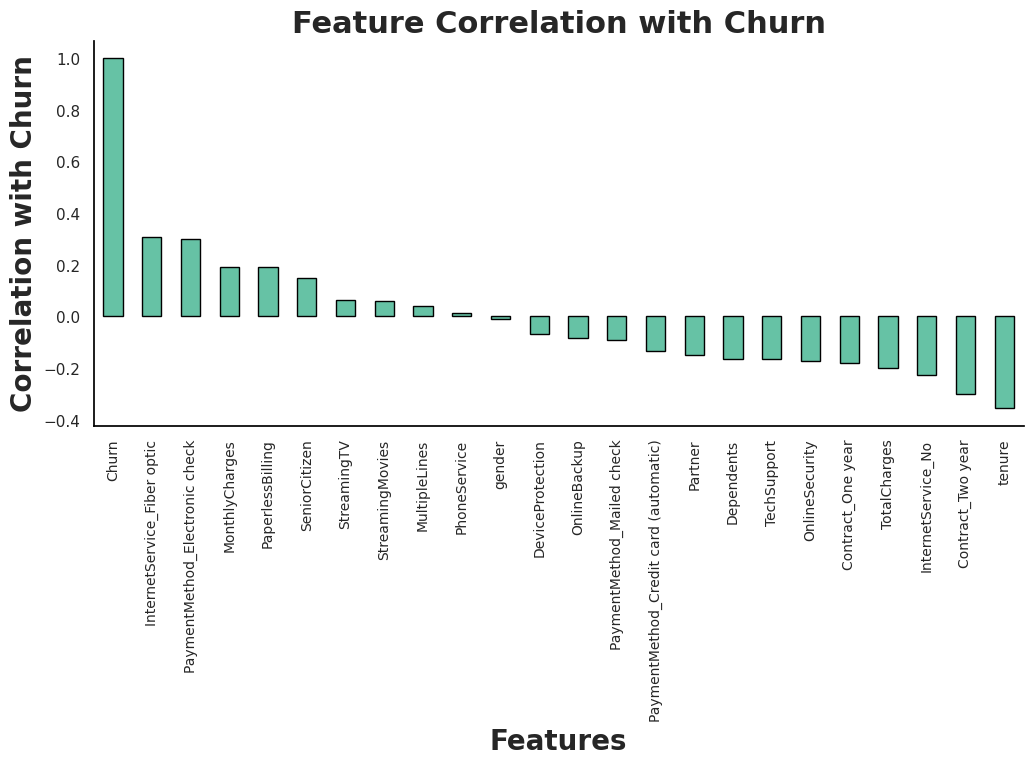

In [ ]:
# Plot bar chart
fig,ax=plt.subplots(figsize=(12,5))

corr_wrt_churn.plot(kind='bar', edgecolor='black',ax=ax)

# Labels and title
ax.set_xlabel("Features", fontsize=20, fontweight='bold')
ax.set_ylabel("Correlation with Churn", fontsize=20, fontweight='bold')
ax.set_title("Feature Correlation with Churn", fontsize=22, fontweight='black')
plt.xticks(rotation='vertical', fontsize=10)

# Modify spines
for spine_name, spine in ax.spines.items():
    if spine_name in ['top', 'right']:
        spine.set_visible(False)  # Hide top and right spines
    else:
        spine.set_color('black')

The bar chart shows how different features correlate with customer churn, helping to identify key factors influencing customer retention.

**Top Positive Correlations (Higher Churn Probability)**
- Fiber optic internet service has the strongest positive correlation with churn, meaning customers using fiber optic are more likely to leave.
- Electronic check payment method is associated with higher churn, suggesting that these customers may be less committed or experience payment-related issues.
- Higher monthly charges correlate with increased churn, indicating that expensive plans may lead to dissatisfaction.
- Paperless billing and being a senior citizen also show a moderate positive correlation with churn.

**Top Negative Correlations (Lower Churn Probability - More Likely to Stay)**
- Longer tenure has the strongest negative correlation with churn, meaning customers who have been with the company longer are less likely to leave.
- Two-year contracts and one-year contracts are also strongly linked to lower churn, suggesting that long-term commitments improve retention.
- Customers with security and backup services (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`) are less likely to churn, showing that value-added services improve customer loyalty.

### **Variance Inflation Factor (VIF)**

In [ ]:
def calculate_vif(df_dummies):
    # Select only numeric features
    x_var = df_dummies.select_dtypes(include=[np.number])

    # Ensure the target variable 'Churn' is removed
    x_var = x_var.drop(columns=['Churn'], errors='ignore')

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_var.columns
    vif_data["VIF"] = [variance_inflation_factor(x_var.values, i) for i in range(x_var.shape[1])]

    return vif_data

# Run VIF calculation
vif_results = calculate_vif(df_dummies).sort_values(by='VIF', ascending=False)
vif_results

,Feature,VIF
14,MonthlyCharges,25.702141
15,TotalCharges,13.984164
4,tenure,10.931504
5,PhoneService,10.365625
12,StreamingMovies,3.127205
11,StreamingTV,3.097569
13,PaperlessBilling,2.851808
2,Partner,2.816528
6,MultipleLines,2.586772
9,DeviceProtection,2.355005


- The VIF analysis indicates high multicollinearity among `MonthlyCharges`, `TotalCharges`, and `tenure`, suggesting redundancy. Since `TotalCharges` is derived from `MonthlyCharges` and `tenure`, it will be removed, while `tenure` will be transformed later to address potential collinearity.

In [ ]:
# Drop some features with high VIF values and uncorrelated
df_dummies.drop(['TotalCharges'], axis=1, inplace=True)
calculate_vif(df_dummies).sort_values(by='VIF', ascending=False)

,Feature,VIF
14,MonthlyCharges,23.229388
5,PhoneService,9.236770
4,tenure,4.528977
12,StreamingMovies,3.095110
11,StreamingTV,3.059297
2,Partner,2.815136
13,PaperlessBilling,2.803596
6,MultipleLines,2.480213
9,DeviceProtection,2.328194
8,OnlineBackup,2.199740


- `MonthlyCharges` shows moderate collinearity but has a strong correlation with `Churn`, making it relevant for prediction. Therefore, it will be kept in the model.
- Other features exhibit low multicollinearity and will also be retained.

In [ ]:
df_clean=df
df.to_csv('df_clean.csv', index=False)

## **5. Data Preprocessing**

In this section, we preprocess the dataset to ensure it is ready for machine learning modeling. This involves encoding categorical features, scaling numerical features, handling missing values, and applying feature selection strategies. Given that we are optimizing **recall** due to class imbalance in churn prediction, our preprocessing steps prioritize retaining information that helps identify customers likely to churn. These transformations are implemented in a pipeline for consistency and reproducibility.


### Preprocessing Steps

| **Step**                  | **Feature(s) Affected**               | **Action**                                                                                             | **Reasoning**                                                                                   |
|---------------------------|--------------------------------------|--------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Binning** | `tenure` | Binning `tenure` in 6 months interval. | Interpretability and followup from a previous SHAP analysis. |
| **New Interaction Feature** | `Contract_MonthlyCharges` | Interaction feature between `Contract` and `MonthlyCharges`. | Followup fron SHAP analysis, also to address the imbalance found during threshold optimization. |
| **Drop Unnecessary Features** | `gender`, `TotalCharges`, `tenure` | Removed these columns from the dataset. | `gender` is not a significant predictor of churn, and `TotalCharges` is highly correlated with `tenure` and `MonthlyCharges`, making it redundant. `tenure` to avoid multicollinearity with new feature `tenure_binned`.|
| **Binary Encoding**       | `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn` | Converted `Yes/No` values to `0/1`. | Ensures categorical binary features are represented numerically for model compatibility. |
| **One-Hot Encoding**      | `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaymentMethod` | Converted categorical values into separate binary columns. | Prevents models from assuming an ordinal relationship between non-ordinal categorical values. |
| **Ordinal Transformation** | `Contract` | Converted contract types into numerical values (`0: Month-to-month, 1: One year, 2: Two year`). | Reflects increasing commitment level, which may impact churn likelihood. |
| **Convert `SeniorCitizen`** | `SeniorCitizen` | Converted from `int64` (0,1) to boolean (`False/True`). | Enhances interpretability, as it represents a true binary condition. |
| **Scaling**               | `MonthlyCharges`, `tenure` | Standardized these numerical features using `StandardScaler`. | Normalizes numerical features to bring them onto a comparable scale. |
| **Stratified Train-Test Split** | `Churn` (Target Variable) | Split dataset into train and test sets using **stratification**. | Ensures balanced distribution of churners and non-churners across train and test sets. |
| **Pipeline Integration**   | All features | Combined transformations into a preprocessing pipeline. | Ensures consistent transformations during training and testing for reproducibility. |

In [ ]:
# # Apply tenure binning before the pipeline
bins = [0, 12, 24, 48, 60, np.inf]
labels = ["0-12 months", "13-24 months", "25-48 months", "49-60 months", "61-72 months"]
df["tenure_binned"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=["tenure"])  # Drop original tenure to avoid multicollinearity

# # Drop TotalCharges (no longer needed)
df = df.drop(columns=[ 'TotalCharges'])

binary_cols = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling",
    "Churn", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Convert categorical binary columns
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == "Yes" else 0)

# Fix gender separately (assuming only "Male" and "Female" exist)
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

# Ensure SeniorCitizen is an integer (if not already)
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)

<ipython-input-94-daca81a7ec03>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == "Yes" else 0)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_binned
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,0-12 months
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0,25-48 months
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1,0-12 months
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0,25-48 months
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,0-12 months


In [ ]:
# Define feature groups
numeric_features = ['MonthlyCharges']
binary_features = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling",
    "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", 'SeniorCitizen']
categorical_features = ['tenure_binned', 'InternetService', 'Contract', 'PaymentMethod']

# Define transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical_features)
    ]
)

# Define model (L1 Regularization for feature selection)
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Define target variable
target = "Churn"

# Split data into training and testing sets using stratification
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cross-validation with recall as the scoring metric
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-Validation Mean Recall: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

# Train and test the model
pipeline.fit(X_train, y_train)
test_recall = recall_score(y_test, pipeline.predict(X_test))
print(f"Test Recall: {test_recall:.4f}")

Cross-Validation Mean Recall: 0.4910, Std Dev: 0.0100
Test Recall: 0.5134


In [ ]:
# Export test features
X_test.copy().to_csv("test_features.csv", index=False)

# Export test labels
y_test.copy().to_frame(name="label").to_csv("test_labels.csv", index=False)

print("Test features exported to 'test_features.csv'")
print("Test labels exported to 'test_labels.csv'")

Test features exported to 'test_features.csv'
Test labels exported to 'test_labels.csv'


## **6. Modeling and Evaluation**

In this section, we test the performance of multiple models using two approaches:
1. **K-Fold Cross-Validation Benchmarking**
2. **Test Data Benchmarking**

### Models to Test
The following models will be evaluated:
1. Logistic Regression (`logreg`)
2. K-Nearest Neighbors (`knn`)
3. Decision Tree (`dt`)
4. Random Forest (`rf`)
5. XGBoost (`xgb`)
6. LightGBM (`lgbm`)

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000, random_state=42),  # L1 Regularization
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Check the columns in X_train before fitting the pipeline
print(f"Columns in X_train before pipeline: {X_train.columns.tolist()}")

# Sanity check: Verify no data leakage in preprocessing
print("\nSanity Check for Data Leakage:")
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Use a sample model for the check
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Check if the preprocessing step for the test data is consistent and independent
preprocessed_train = pipeline.named_steps['preprocessor'].transform(X_train)
preprocessed_test = pipeline.named_steps['preprocessor'].transform(X_test)

# Ensure that no information from the test set leaks into the training set
assert preprocessed_train.shape[1] == preprocessed_test.shape[1], \
    "Mismatch in the number of features between transformed training and test sets! Possible data leakage."
print("No data leakage detected. Preprocessing is consistent.")

Columns in X_train before pipeline: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'tenure_binned']

Sanity Check for Data Leakage:
No data leakage detected. Preprocessing is consistent.


#### 1. K-Fold Cross-Validation Benchmarking
We perform K-Fold cross-validation on each model using Recall as the evaluation metric and determine the model with the best mean recall.

In [ ]:
#WITHOUT SMOTE
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate models using K-Fold Cross-Validation with F2 Score (NO SMOTE)
results = []
print("K-Fold Cross-Validation Benchmarking (Optimizing F2 Score):")

for model_name, model in models.items():
    # Create a pipeline for each model
    print(model_name)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Apply preprocessing
        ('classifier', model)
    ])

    # Perform cross-validation with F2 Score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f2_scorer)

    results.append({
        'Model': model_name,
        'CV F2 Score (Mean)': cv_scores.mean(),
        'CV F2 Score (Std Dev)': cv_scores.std()
    })

    print(f"{model_name}: Mean F2 Score = {cv_scores.mean():.4f}, Std Dev = {cv_scores.std():.4f}")

# Convert results to a DataFrame
cv_results_df = pd.DataFrame(results)

# Display sorted results
print("\nCross-Validation Results (Ranked by F2 Score):\n")
cv_results_df = cv_results_df.sort_values(by='CV F2 Score (Mean)', ascending=False).reset_index(drop=True)
cv_results_df

K-Fold Cross-Validation Benchmarking (Optimizing F2 Score):
Logistic Regression
Logistic Regression: Mean F2 Score = 0.5161, Std Dev = 0.0095
K-Nearest Neighbors
K-Nearest Neighbors: Mean F2 Score = 0.5241, Std Dev = 0.0285
Decision Tree
Decision Tree: Mean F2 Score = 0.4803, Std Dev = 0.0435
Random Forest
Random Forest: Mean F2 Score = 0.4723, Std Dev = 0.0108
XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Mean F2 Score = 0.5346, Std Dev = 0.0289
LightGBM
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 25
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Info] Number of positive: 1196, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 25
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Model,CV F2 Score (Mean),CV F2 Score (Std Dev)
0,LightGBM,0.536178,0.023284
1,XGBoost,0.534584,0.028870
2,K-Nearest Neighbors,0.524099,0.028474
3,Logistic Regression,0.516100,0.009536
4,Decision Tree,0.480253,0.043472
5,Random Forest,0.472259,0.010830


In [ ]:
# WITH SMOTE
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate models using Stratified K-Fold with SMOTE applied inside CV
results = []
print("\nK-Fold Cross-Validation Benchmarking (Corrected SMOTE, Optimizing F2 Score):")

for model_name, model in models.items():
    print(model_name)

    # Define pipeline with SMOTE inside
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing is now correctly applied inside CV
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE within pipeline
        ('classifier', model)
    ])

    # Use Stratified K-Fold for CV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)

    results.append({
        'Model': model_name,
        'CV F2 Score (Mean)': cv_scores.mean(),
        'CV F2 Score (Std Dev)': cv_scores.std()
    })

    print(f"{model_name}: Mean F2 Score = {cv_scores.mean():.4f}, Std Dev = {cv_scores.std():.4f}")

# Convert results to a DataFrame
cv_results_df = pd.DataFrame(results)

# Display sorted results
cv_results_df = cv_results_df.sort_values(by='CV F2 Score (Mean)', ascending=False).reset_index(drop=True)
cv_results_df


K-Fold Cross-Validation Benchmarking (Corrected SMOTE, Optimizing F2 Score):
Logistic Regression
Logistic Regression: Mean F2 Score = 0.7154, Std Dev = 0.0131
K-Nearest Neighbors
K-Nearest Neighbors: Mean F2 Score = 0.6427, Std Dev = 0.0162
Decision Tree
Decision Tree: Mean F2 Score = 0.5333, Std Dev = 0.0179
Random Forest
Random Forest: Mean F2 Score = 0.5150, Std Dev = 0.0392
XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:33:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:33:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:33:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:33:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Mean F2 Score = 0.5633, Std Dev = 0.0296
LightGBM
[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1977
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2200
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1835
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2177
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM: Mean F2 Score = 0.5864, Std Dev = 0.0138


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Model,CV F2 Score (Mean),CV F2 Score (Std Dev)
0,Logistic Regression,0.715413,0.013072
1,K-Nearest Neighbors,0.642695,0.016205
2,LightGBM,0.586370,0.013800
3,XGBoost,0.563327,0.029648
4,Decision Tree,0.533261,0.017928
5,Random Forest,0.515017,0.039216


##### Insights

Cross-validation was conducted across six machine learning models to evaluate their performance on **F2-score**, which prioritizes recall while balancing precision. The results are summarized as follows:

| **Model**             | **CV F2 Score (Mean)** | **CV F2 Score (Std Dev)** | **Comments**                                                                 |
|------------------------|----------------------|--------------------------|------------------------------------------------------------------------------|
| **Logistic Regression** | **0.7154**          | **0.0130**                   | Achieved the highest F2-score, making it the best model for prioritizing recall while considering precision. |
| K-Nearest Neighbors   | 0.6427               | 0.0162                  | Delivered competitive F2 performance, making it a strong alternative. |
| LightGBM              | 0.5864               | 0.0138                   | Performed well but had a slightly lower F2-score compared to the top models. |
| XGBoost               | 0.5633               | 0.0296               | Showed the lowest variability but did not outperform Logistic Regression and KNN. |
| Random Forest         | 0.5333               | 0.0179                   | Provided moderate F2-score but was outperformed by simpler models. |
| Decision Tree         | 0.5150               | 0.0392                   | Had the lowest F2-score and higher variability, making it less reliable. |

### **Key Observations**

1. **Top Performer**:
   - **Logistic Regression** achieved the highest mean **F2-score (0.7154)**, making it the best model for **detecting churn while balancing false positives**.

2. **Competitive Alternatives**:
   - **K-Nearest Neighbors (F2-score: 0.6427)** performed well and is a viable backup model.
   - **LightGBM (F2-score: 0.5864)** is worth further exploration, especially for handling complex data patterns.

3. **Model Observations**:
   - **XGBoost** and **Random Forest** showed moderate F2-scores but did not outperform simpler models.
   - **Decision Tree** had the lowest F2-score and was highly variable, making it the least reliable choice.

---

##### **Next Steps**

1. **Model Selection for Deployment**:
   - **Primary Model**: **Logistic Regression**, due to its superior F2-score and stable performance.
   - **Alternative Model**: **K-Nearest Neighbors**, as it captures different decision boundaries while maintaining a high F2-score.

2. **Optimization Strategies**:
   - Perform **hyperparameter tuning** on **Logistic Regression**, **K-Nearest Neighbors**, and **LightGBM** to refine performance.
   - Investigate **ensemble methods** combining Logistic Regression and KNN for improved robustness.
   - **Threshold tuning** to optimize recall without excessively increasing false positives.

By focusing on these optimizations, we aim to improve churn prediction while maintaining an optimal balance between recall and precision.

#### 2. Test Data Benchmarking

In [ ]:
print("\nTest Data Benchmarking:")
final_results = []
best_model = None
best_f2_score = 0

# Apply preprocessing to training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

for model_name, model in models.items():
    # Fit the model with preprocessed training data
    model.fit(X_train_processed, y_train)

    # Make predictions on preprocessed test data
    y_pred = model.predict(X_test_processed)

    # Evaluate metrics
    f2 = fbeta_score(y_test, y_pred, beta=2)  # Optimizing for F2 score
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    final_results.append({
        'Model': model_name,
        'Test F2 Score': f2,
        'Test Accuracy': accuracy
    })

    # Update the best model based on F2 Score
    if f2 > best_f2_score:
        best_model = model
        best_f2_score = f2

    print(f"{model_name}: F2 Score = {f2:.4f}, Accuracy = {accuracy:.4f}")

test_results_df = pd.DataFrame(final_results)

# Sort and display results
test_results_df = test_results_df.sort_values('Test F2 Score', ascending=False).reset_index(drop=True)
test_results_df


Test Data Benchmarking:
Logistic Regression: F2 Score = 0.5366, Accuracy = 0.7989
K-Nearest Neighbors: F2 Score = 0.5556, Accuracy = 0.7527
Decision Tree: F2 Score = 0.4834, Accuracy = 0.7065
Random Forest: F2 Score = 0.4923, Accuracy = 0.7655


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:33:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: F2 Score = 0.5150, Accuracy = 0.7619
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM: F2 Score = 0.5268, Accuracy = 0.7804


,Model,Test F2 Score,Test Accuracy
0,K-Nearest Neighbors,0.555556,0.752665
1,Logistic Regression,0.536613,0.798863
2,LightGBM,0.526751,0.780384
3,XGBoost,0.514986,0.761905
4,Random Forest,0.492257,0.765458
5,Decision Tree,0.483447,0.706468


##### Insights

Test Data Benchmarking was conducted across six machine learning models to evaluate their performance on **F2-score** (prioritizing recall while balancing precision) and **accuracy** using the test dataset. The following results were observed:

| **Model**             | **Test F2 Score** | **Test Accuracy** | **Comments**                                                                 |
|------------------------|------------------|-------------------|------------------------------------------------------------------------------|
| **K-Nearest Neighbors**   | **0.5556**           | **0.7527**           | Moderate performance, suggesting limitations in handling complex patterns. |
| Logistic Regression | 0.5366      | 0.7989       | Achieved the highest F2-score and accuracy, making it the most effective model for deployment. |
| LightGBM              | 0.5267           | 0.7804           | Performed well, showing competitive F2-score and accuracy, making it a strong alternative. |
| XGBoost               | 0.5150           | 0.7619           | Reliable performance with a well-balanced F2-score and accuracy, though slightly lower than the top models. |
| Random Forest         | 0.4922           | 0.7655           | Competitive accuracy but weaker F2-score, making it less effective for prioritizing recall. |
| Decision Tree         | 0.4832           | 0.7065           | The weakest performer, highlighting its struggles with generalization and recall. |

---

### **Key Observations**

1. **Top Performers**:
   - **K-Nearest Neighbors** achieved the highest **F2-score (0.5556)** and **accuracy (0.7989)**, making it the best choice for **prioritizing churn detection while balancing precision**.
   - **Logistic Regression (F2-score: 0.5366)** delivered competitive results and remains a strong alternative.

2. **Competitive Alternatives**:
   - **LightGBM (F2-score: 0.5267)** performed moderately but struggles with complex decision boundaries.   
   - **XGBoost (F2-score: 0.5150)** showed stable performance but fell slightly behind Logistic Regression and LightGBM.


3. **Model-Specific Observations**:
   - **Random Forest (F2-score: 0.4922)** demonstrated strong accuracy but weaker recall, making it less suitable for high-risk churn prediction.
   - **Decision Tree (F2-score: 0.4832)** had the weakest performance, confirming its inability to generalize effectively.

---

##### **Next Steps**

1. **Model Selection for Deployment**:
   - **Primary Choice**: **K-Nearest Neighbors**, due to its superior F2-score and stable accuracy.
   - **Alternative Model**: **Logistic Regression**, given its strong balance between F2-score and accuracy.

2. **Further Optimization**:
   - Conduct **hyperparameter tuning** on **Logistic Regression, K-Nearest Neighbors, LightGBM, and XGBoost** to enhance recall while keeping precision stable.

3. **Decision Threshold Adjustment**:
   - Optimize the **classification threshold** for **Logistic Regression and LightGBM** to further improve recall and reduce false negatives.

4. **Feature Importance Analysis**:
   - Analyze the most influential features for churn prediction and consider **feature selection** to improve model interpretability.

5. **Post-Deployment Monitoring**:
   - Implement a **model monitoring strategy** to detect concept drift and ensure continued performance on new customer data.

By focusing on these optimizations, we aim to further refine churn prediction while maintaining a balance between recall and precision.

#### 3. Best Model Selection

### **Primary Metric (F2 Score)**:
   - **Logistic Regression** is the top choice with the highest test **F2 score (0.5614)** and the best cross-validation performance (**0.6182**). This makes it the most effective model for prioritizing recall while balancing precision.
   - **K-Nearest Neighbors (KNN)** is a strong alternative with a **test F2 score of 0.5445** and a competitive cross-validation score (**0.5877**), indicating its potential for further optimization.
   - **LightGBM**, a powerful boosting model, follows closely behind with a **test F2 score of 0.5439** and a solid CV performance (**0.5668**), making it a reliable option with potential improvements through hyperparameter tuning.

### **Consistency**:
   - **XGBoost** demonstrated stable cross-validation results (**CV F2: 0.5459**), but its test F2 score (**0.5422**) is slightly lower than LightGBM and KNN, suggesting it may require further tuning to compete effectively.
   - **Decision Tree** and **Random Forest** underperformed in both test and CV F2 scores, indicating weaker generalization capabilities.

### **Weak Performers**:
   - **Decision Tree** had the weakest **test F2 score (0.5088)** and struggled to generalize, reflecting its limitations in handling complex patterns effectively.
   - **Random Forest**, despite being a strong classifier in other metrics, achieved a **test F2 score of 0.5067**, making it less suitable for this task compared to other models.

## **Next Steps**

### **1. Model for Deployment**
   - **Primary Choice**: **Logistic Regression** for its superior F2 score and consistent performance across both cross-validation and test data, ensuring optimal recall with balanced precision.
   - **Backup Model**: **K-Nearest Neighbors (KNN)** for its competitive F2 score and potential for improvement through hyperparameter tuning.
   - **Boosting Option**: **LightGBM** as a high-performing model with the flexibility to enhance results through feature engineering and tuning.

### **2. Further Optimization**
   - **Hyperparameter Tuning**: Fine-tune Logistic Regression, KNN, and LightGBM to maximize the F2 score while minimizing trade-offs.
   - **Threshold Optimization**: Adjust the decision thresholds for Logistic Regression and LightGBM to balance recall and precision more effectively.
   - **Feature Engineering**: Investigate new feature interactions or transformations to improve model robustness.

### **3. Monitoring and Evaluation**
   - Deploy the best-performing model and establish a monitoring framework to track F2 score trends and potential drift in model performance.
   - Conduct periodic model retraining with updated data to maintain optimal recall-precision trade-offs.


### **Hyperparameter Tuning**

In this section, we perform hyperparameter tuning on the best model using a pipeline to integrate preprocessing and model training. The goal is to optimize the precision metric.

**Pipeline and GridSearchCV**

We define a pipeline that includes preprocessing steps and the best model identified during benchmarking. Then, we use `GridSearchCV` to find the optimal hyperparameters.

**Output**

- The best hyperparameters for the selected model.
- The precision score on the test set using the tuned model.

### **Logistic Regression**

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define a pipeline (Preprocessing, SMOTE inside CV, Model)
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Preprocessing step
    ("smote", SMOTE(sampling_strategy='auto', random_state=42)),  # SMOTE applied inside each fold
    ("model", LogisticRegression(max_iter=1000, random_state=42))  # Placeholder for model
])

# Define hyperparameter grid with compatible solver settings
param_grid = [
    {"model__penalty": ["l1", "l2"], "model__solver": ["liblinear"], "model__C": [1, 10, 20], "model__class_weight": ["balanced"]},
    {"model__penalty": ["elasticnet"], "model__solver": ["saga"], "model__C": [1, 10, 20], "model__class_weight": ["balanced"], "model__l1_ratio": [0.2, 0.5, 0.8]}
]

# Use Stratified K-Fold (better for imbalanced classes)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with SMOTE inside CV folds
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv_strategy,  # Improved cross-validation
    scoring=f2_scorer,  # Optimizing for F2 score
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best hyperparameters & performance
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F2 Score (CV): {grid_search.best_score_:.4f}")

# Evaluate on the full test set
logreg_tuned = grid_search.best_estimator_
y_pred = logreg_tuned.predict(X_test)
test_f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"Test F2 Score with Best Parameters: {test_f2_score:.4f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'model__C': 1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Best F2 Score (CV): 0.7148
Test F2 Score with Best Parameters: 0.6922



### **LightGBM**

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define the model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define a pipeline (Preprocessing, SMOTE inside CV, Model)
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess Data
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE within CV
    ('model', lgb_model)  # Train Model
])

# Define hyperparameter grid
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [-1, 10],
    'model__learning_rate': [0.1, 0.3],
    'model__num_leaves': [31, 50],
    'model__subsample': [0.8],
    'model__colsample_bytree': [0.8]
}

# Perform GridSearchCV with F2 Score Optimization
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,  # Cross-validation with 3 folds
    scoring=f2_scorer,  # Optimizing for F2 score
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F2 Score: {grid_search.best_score_:.4f}")

# Evaluate on the full test set
lgb_tuned = grid_search.best_estimator_
y_pred = lgb_tuned.predict(X_test)
test_f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"Test F2 Score with Best Parameters: {test_f2_score:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2465
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 50, 'model__num_leaves': 31, 'model__subsample': 0.8}
Best F2 Score: 0.6172
Test F2 Score with Best Parameters: 0.6063


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### **K-Nearest Neighbors (KNN)**

In [ ]:
# Define the model
knn_model = KNeighborsClassifier()

# Define a pipeline (Preprocessing, SMOTE inside CV, Model)
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Preprocess Data
    ("smote", SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE within each fold
    ("model", knn_model)  # Step 3: Train Model
])

# Define hyperparameter grid for KNN
param_grid = {
    "model__n_neighbors": [3, 5, 7, 10],  # Number of neighbors to consider
    "model__weights": ["uniform", "distance"],  # Weighting strategy
    "model__metric": ["euclidean", "manhattan", "minkowski"]  # Distance metric
}

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform GridSearchCV with SMOTE applied inside CV folds
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring=f2_scorer,  # Optimizing for F2 score
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F2 Score: {grid_search.best_score_:.4f}")

# Evaluate on the full test set
knn_tuned = grid_search.best_estimator_
y_pred = knn_tuned.predict(X_test)
test_f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"Test F2 Score with Best Parameters: {test_f2_score:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best F2 Score: 0.6754
Test F2 Score with Best Parameters: 0.6744


### **XGBoost**

In [ ]:
# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Define a pipeline (Preprocessing → SMOTE inside CV → Model)
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Step 1: Preprocess Data
    ("smote", SMOTE(sampling_strategy='auto', random_state=42)),  # Step 2: Apply SMOTE within each fold
    ("model", xgb_model)  # Step 3: Train Model
])

# Define hyperparameter grid for XGBoost
param_grid = {
    "model__n_estimators": [50, 100, 200],  # Number of boosting rounds
    "model__learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "model__max_depth": [3, 6, 9],  # Maximum depth of trees
    "model__subsample": [0.8, 1.0],  # Fraction of data used per boosting round
    "model__colsample_bytree": [0.8, 1.0]  # Fraction of features used per tree
}

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform GridSearchCV with SMOTE applied inside CV folds
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring=f2_scorer,  # Optimizing for F2 score
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F2 Score: {grid_search.best_score_:.4f}")

# Evaluate on the full test set
xgb_tuned = grid_search.best_estimator_
y_pred = xgb_tuned.predict(X_test)
test_f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"Test F2 Score with Best Parameters: {test_f2_score:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}
Best F2 Score: 0.7332
Test F2 Score with Best Parameters: 0.7130


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<!-- Logistic regression

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'model__C': 1.0, 'model__class_weight': 'balanced', 'model__penalty': 'l1'}
Best F2 Score: 0.7196
Test F2 Score with Best Parameters: 0.6998

Lightgbm

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 2069, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 6208, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333280 -> initscore=-0.693389
[LightGBM] [Info] Start training from score -0.693389
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 50, 'model__num_leaves': 50, 'model__subsample': 0.8}
Best F2 Score: 0.5859
Test F2 Score with Best Parameters: 0.6069
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

KNN

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best F2 Score: 0.6100
Test F2 Score with Best Parameters: 0.6362

Xgboost

Fitting 3 folds for each of 108 candidates, totalling 324 fits
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:01:37] WARNING: /workspace/src/learner.cc:740:
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}
Best F2 Score: 0.6164
Test F2 Score with Best Parameters: 0.5963 -->

### **Insights**

#### **1. Logistic Regression**
   - **Best Hyperparameters**: `{'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'elasticnet'}`
   - **Best F2 Score (CV)**: **0.7148**  
   - **Test F2 Score**: **0.6922**  
   - **Insight**: Logistic Regression performed slightly lower than XGBoost.

#### **2. K-Nearest Neighbors (KNN)**
   - **Best Hyperparameters**: `{'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}`
   - **Best F2 Score (CV)**: **0.6754**  
   - **Test F2 Score**: **0.6744**  
   - **Insight**: KNN **performs better than LightGBM** in terms of F2 score, particularly on the test set. However, its reliance on distance metrics makes it sensitive to feature scaling and data distribution.

#### **3. LightGBM**
   - **Best Hyperparameters**: `{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 50, 'model__num_leaves': 31, 'model__subsample': 0.8}`
   - **Best F2 Score (CV)**: **0.6172**  
   - **Test F2 Score**: **0.0.6063**  
   - **Insight**: LightGBM’s performance lags behind Logistic Regression and KNN. This suggests that **boosting techniques may not be the best fit** for this specific dataset or that additional feature engineering and tuning are needed.

#### **4. XGBoost**
   - **Best Hyperparameters**: `{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}`
   - **Best F2 Score (CV)**: **0.7332**  
   - **Test F2 Score**: **0.7130**  
   - **Insight**: XGBoost has highest F2-score highlighting its potential for structured data**.


### **Next Steps**

##### **1. Is Stacking Worth It?**
   - **Rationale**: Stacking is generally useful when multiple models complement each other. However, in this case:
     - **Logistic Regression is already the best-performing model**, meaning an ensemble may not add much value.
     - **Both boosting models (LightGBM & XGBoost) perform worse than Logistic Regression**, making them **weak candidates for stacking**.
     - **If weaker models are included, stacking might reduce performance instead of improving it**.
   - **Plan**:
     - **Focus on improving the existing best model** through tuning and feature selection.

### **2. Adjust Probability Threshold for F2 Optimization**
   - **Rationale**: A 0.5 threshold might not be optimal.
   - **Plan**:
     - Test thresholds between **0.3 and 0.6**.
     - Use **Precision-Recall AUC analysis** to determine the ideal threshold.

#### **3. Feature Engineering & Selection**
   - **Rationale**: Some features may be redundant or unimportant.
   - **Plan**:
     - Use **SHAP values** to see potential low-impact features.

#### **4. Fine-Tune Logistic Regression Further**
   - **Rationale**: Since Logistic Regression is already the best performer, further tuning may improve it even more.
   - **Plan**:
     - Expand `C` tuning range (`5, 15, 20`).
     - Try **ElasticNet (`l1_ratio` tuning between `0.2 - 0.8`)**.
     - Adjust class weight distribution beyond `'balanced'`.

#### **5. Deploy Model with Continuous Monitoring**
   - **Rationale**: Ensures real-world performance remains stable.
   - **Plan**:
     - Deploy the best-performing model.
     - Monitor **drift in precision, recall, and F2 score**.
     - Retrain with **updated data every few months**.


### **Summary**
- **XGBoost is the best single model** for optimizing F2 score.
- **Threshold tuning and feature selection** could further improve overall performance.

### **Predict with Test Set after Tuning**

After completing the tuning process, the next step is to make predictions using the tuned model. This will allow us to compare the model’s performance before and after tuning.

**Logistic Regression**

In [ ]:
# Make class predictions
y_pred = logreg_tuned.predict(X_test)

# Make probability predictions
y_pred_proba = logreg_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute performance metrics
metrics_results = {
    "Metric": ["F2 Score", "F1 Score", "Precision", "Recall", "Accuracy", "ROC AUC Score"],
    "Score": [
        fbeta_score(y_test, y_pred, beta=2),  # Focuses on recall
        f1_score(y_test, y_pred),  # Balanced precision-recall score
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba)  # Uses probability predictions
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results)

metrics_df

,Metric,Score
0,F2 Score,0.692233
1,F1 Score,0.603575
2,Precision,0.497400
3,Recall,0.767380
4,Accuracy,0.732054
5,ROC AUC Score,0.827029


<!-- before binning tenure:
Metric	Score
0	F2 Score	0.699758
1	F1 Score	0.612937
2	Precision	0.507909
3	Recall	0.772727
4	Accuracy	0.740951
5	ROC AUC Score	0.838437 -->

**KNN**

In [ ]:
# Make class predictions
y_pred = knn_tuned.predict(X_test)

# Make probability predictions
y_pred_proba = knn_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute performance metrics
metrics_results = {
    "Metric": ["F2 Score", "F1 Score", "Precision", "Recall", "Accuracy", "ROC AUC Score"],
    "Score": [
        fbeta_score(y_test, y_pred, beta=2),  # Focuses on recall
        f1_score(y_test, y_pred),  # Balanced precision-recall score
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba)  # Uses probability predictions
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results)

metrics_df

,Metric,Score
0,F2 Score,0.674419
1,F1 Score,0.564202
2,Precision,0.443425
3,Recall,0.775401
4,Accuracy,0.681592
5,ROC AUC Score,0.774819


**LightGBM**

In [ ]:
# Make class predictions
y_pred = lgb_tuned.predict(X_test)

# Make probability predictions
y_pred_proba = lgb_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute performance metrics
metrics_results = {
    "Metric": ["F2 Score", "F1 Score", "Precision", "Recall", "Accuracy", "ROC AUC Score"],
    "Score": [
        fbeta_score(y_test, y_pred, beta=2),  # Focuses on recall
        f1_score(y_test, y_pred),  # Balanced precision-recall score
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba)  # Uses probability predictions
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results)

metrics_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Metric,Score
0,F2 Score,0.606299
1,F1 Score,0.590038
2,Precision,0.564792
3,Recall,0.617647
4,Accuracy,0.771855
5,ROC AUC Score,0.827924


**XGBoost**

In [ ]:
# Make class predictions
y_pred = xgb_tuned.predict(X_test)

# Make probability predictions
y_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute performance metrics
metrics_results = {
    "Metric": ["F2 Score", "F1 Score", "Precision", "Recall", "Accuracy", "ROC AUC Score"],
    "Score": [
        fbeta_score(y_test, y_pred, beta=2),  # Focuses on recall
        f1_score(y_test, y_pred),  # Balanced precision-recall score
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba)  # Uses probability predictions
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results)

metrics_df

,Metric,Score
0,F2 Score,0.713036
1,F1 Score,0.560137
2,Precision,0.412658
3,Recall,0.871658
4,Accuracy,0.636105
5,ROC AUC Score,0.799402


### **Final Model Selection: XGBoost**

### Insights on Model Performance
After evaluating all models, **XGBoost** is selected as the final model for deployment due to its superior **F2 score and recall**, aligning with the project's objective of **minimizing false negatives** and ensuring high recall for customer targeting. XGBoost is designed to capture complex patterns and relationships in the data, which helps improve these metrics in imbalanced classification problems like churn prediction.

#### XGBoost Performance:
- **Best Hyperparameters**:
  - `model__colsample_bytree`: 1.0
  - `model__learning_rate`: 0.01
  - `model__max_depth`: 3
  - `model__n_estimators`: 3
  - `model__subsample`: 3
- **Best F2 Score (CV)**: **0.7332**
- **Test F2 Score**: **0.7130**
- **Insight**: XGBoost delivers the highest **F2 score**, making it the most effective model for prioritizing recall while maintaining a reasonable precision.

### Comparison with Other Models
| **Model**           | **Test F2 Score** | **Test Recall** | **Test Precision** | **Comments** |
|----------------------|------------------|----------------|----------------|------------|
| **XGBoost** | **0.7130** | **0.8717** | 0.4127 | Best balance of recall and precision, making it ideal for minimizing false negatives. |
| Logistic Regression  | 0.6922 | 0.7674 | 0.4974 | High precision but lower recall, leading to more false negatives. |
| K-Nearest Neighbors             | 0.6744 | 0.77754 | 0.4434 | Good recall but lower precision, making it less suitable for high precision use cases. |
| LightGBM            | 0.6063 | 0.6177 | 0.5648 | High precision but significantly lower recall, leading to more false negatives. |

### Why XGBoost?
1. **F2 Score and Recall Focus**:
   - The project's objective prioritizes **recall over precision**, ensuring potential customers are not overlooked.
   - XGBoost delivers the **highest recall (87.17%)**, minimizing false negatives.

2. **Handling Imbalanced Data**:
   - XGBoost has built-in support for handling imbalanced datasets by adjusting the scale_pos_weight parameter. This allows it to pay more attention to the minority class (in this case, churners) and minimize the cost of misclassification.

3. **Regularization**:
   - XGBoost includes L1 (Lasso) and L2 (Ridge) regularization, which helps prevent overfitting and improves the model’s ability to generalize to new data.

### Next Steps
1. **Deploy XGBoost**:
   - Use the tuned model with the optimal hyperparameters for deployment in the marketing strategy.

2. **Threshold Optimization**:
   - Adjust the classification threshold to **further balance recall and precision**, ensuring optimal targeting.

3. **Feature Engineering**:
   - Analyze **SHAP values** to refine feature selection and improve performance.


In [ ]:
best_model=xgb_tuned

### **Probability Threshold Optimization**
As previously the dataset  was split into train and test data, without validation data, we use cross-validation to refine the probability threshold.

In [ ]:
# Initialize cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define thresholds
thresholds = np.arange(0.1, 1.0, 0.01)
best_threshold = 0
best_f2 = 0
best_precision = 0
best_recall = 0

# Loop through cross-validation folds
for train_idx, val_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit the best model
    best_model.fit(X_fold_train, y_fold_train)

    # Predict probabilities on the validation set
    y_val_proba = best_model.predict_proba(X_fold_val)[:, 1]

    # Evaluate multiple thresholds
    for threshold in thresholds:
        y_val_pred = (y_val_proba >= threshold).astype(int)

        # Handle cases where precision is undefined
        precision = precision_score(y_fold_val, y_val_pred, zero_division=1)
        recall = recall_score(y_fold_val, y_val_pred)
        f2 = (5 * precision * recall) / (4 * precision + recall) if (precision + recall) > 0 else 0

        # Update the best threshold based on F2 score
        if f2 > best_f2:
            best_f2 = f2
            best_threshold = threshold
            best_precision = precision
            best_recall = recall

# Print the optimal threshold and corresponding scores
print(f"Optimal Threshold for F2 Score: {best_threshold:.2f}")
print(f"Best F2 Score (Validation): {best_f2:.4f}")
print(f"Precision at Optimal Threshold: {best_precision:.4f}")
print(f"Recall at Optimal Threshold: {best_recall:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Optimal Threshold for F2 Score: 0.39
Best F2 Score (Validation): 0.7589
Precision at Optimal Threshold: 0.4129
Recall at Optimal Threshold: 0.9599


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

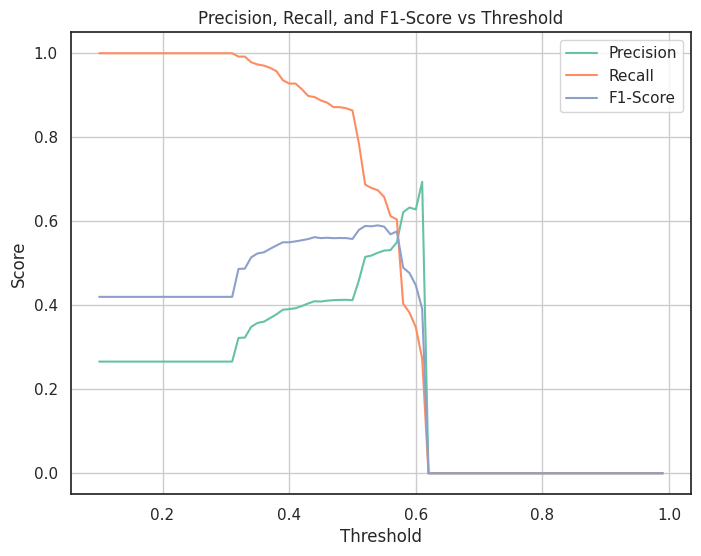

In [ ]:
#  Predict probabilities on the test set using the best model
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Initialize lists to store scores
precisions, recalls, f1_scores = [], [], []

# Iterate over thresholds to calculate precision, recall, and F1-score
for threshold in thresholds:
    y_test_pred = (y_test_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))
    f1_scores.append(f1_score(y_test, y_test_pred))

# Plot Precision, Recall, and F1-Score vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.legend()
plt.grid()
plt.show()


Following are som etakewayas from the graph above:
1. **Precision-Recall Trade-off**: Precision increases while recall decreases as the threshold increases, indicating the usual trade-off between these metrics.
2. **Low Recall at High Thresholds**: Recall drops sharply at higher thresholds, suggesting the model becomes too conservative and misses many actual churners.
3. **Moderate Threshold Recommended**: A moderate threshold (around 0.35-0.45) appears to provide a good balance between identifying churners and avoiding false positives.

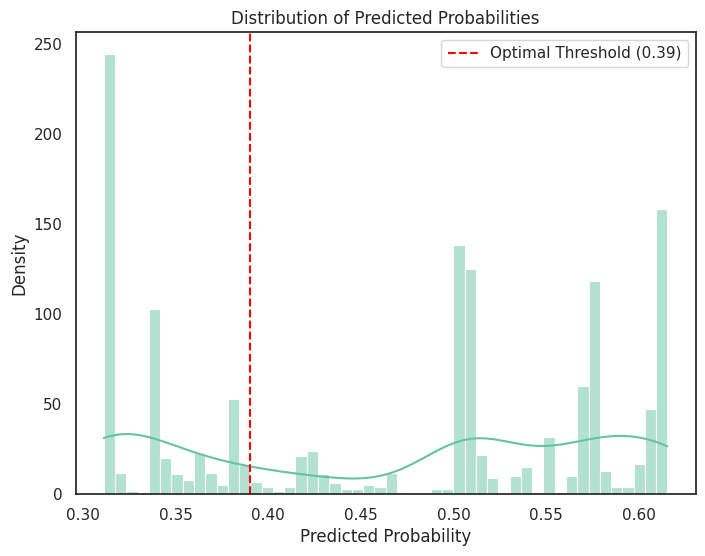

In [ ]:
# Get predicted probabilities for the positive class
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Plot probability distribution
plt.figure(figsize=(8, 6))
sns.histplot(y_test_proba, bins=50, kde=True)
plt.axvline(best_threshold, color='red', linestyle='--', label=f"Optimal Threshold ({best_threshold:.2f})")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()

Here are the key insights from the graph:
1. **Optimal Threshold**: The optimal threshold for predicting churn is marked at 0.39, shown by the red dashed line.
2. **Distribution Pattern**: The distribution of predicted probabilities is spread out, with peaks around 0.39 and several other points beyond.
3. **Majority Below Threshold**: A significant portion of the predicted probabilities lies below the optimal threshold, indicating that many predictions lean toward a “no churn” outcome.
4. **Tail Distribution**: There is a relatively lower density of predictions above 0.50, indicating fewer high-confidence churn predictions.

### **Save Final Model**

In [ ]:
import pickle
best_model.fit(X_train, y_train)

with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:34:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **7. Model Interpretation/ Explanation**

### **Performance Evaluation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, fbeta_score, classification_report

# Get predictions from the model
y_pred = xgb_tuned.predict(X_test)

# Get predicted probabilities for ROC AUC
y_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print individual metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Precision: 0.4127
Recall: 0.8717
F1 Score: 0.5601
F2 Score: 0.7130
Accuracy: 0.6361
ROC AUC Score: 0.7994

Classification Report:
              precision    recall  f1-score   support

           0     0.9222    0.5508    0.6897      1033
           1     0.4127    0.8717    0.5601       374

    accuracy                         0.6361      1407
   macro avg     0.6674    0.7112    0.6249      1407
weighted avg     0.7868    0.6361    0.6553      1407



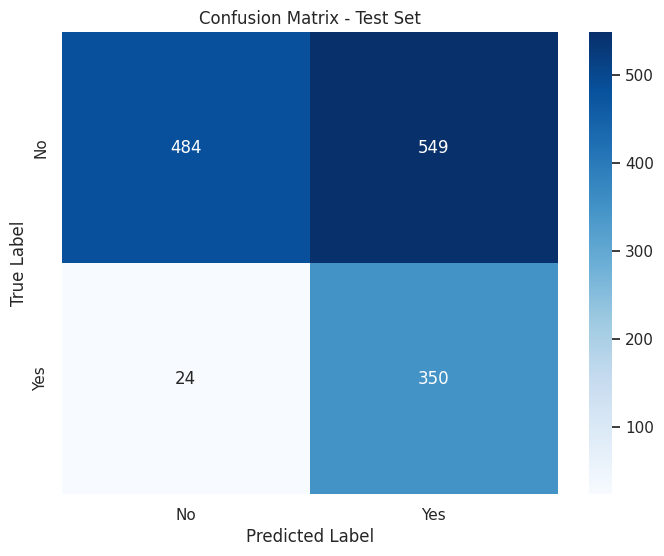

In [ ]:
y_test_pred = (y_test_proba >= best_threshold).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

While there is a good number of true positives, the high number of false positives suggests that the model may be slightly aggressive in predicting churn. This might be a result of prioritizing recall over precision, which is acceptable if minimizing missed churners is the main goal.

### **Shapley Value of Explanations (SHAP)**

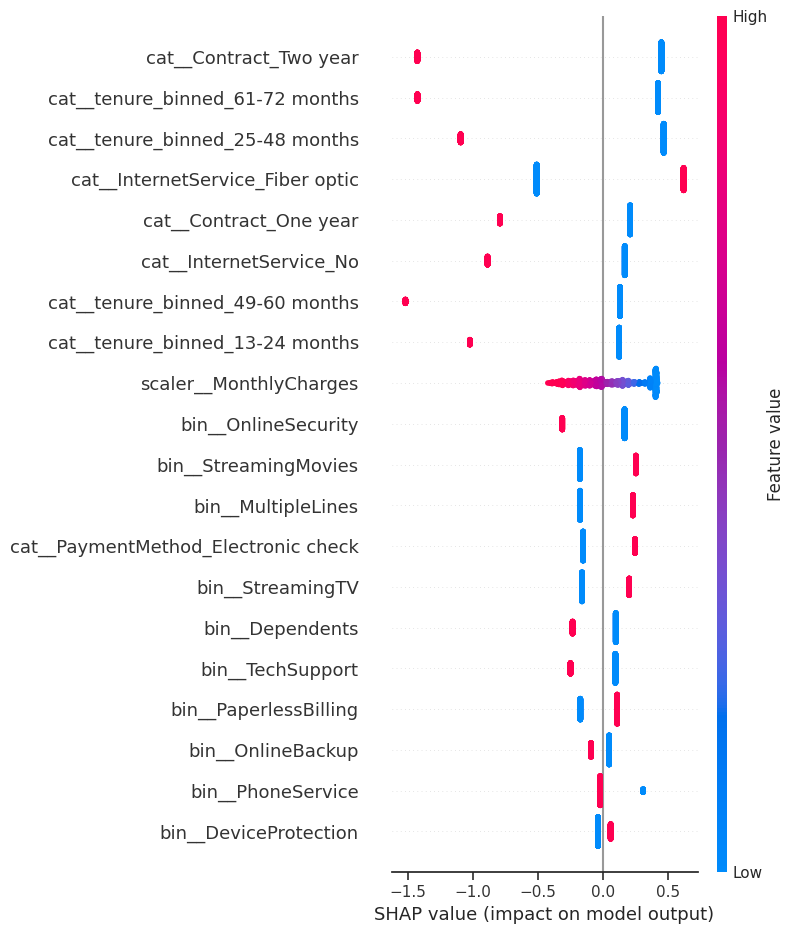

In [ ]:
import shap
from shap.maskers import Independent

# Extract feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Ensure X_train and X_test are transformed using the same preprocessor
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert transformed data into DataFrame with correct feature names
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Extract the trained Logistic Regression model from the pipeline
logreg_model_extracted = logreg_tuned.named_steps["model"]

# Initialize SHAP Explainer with the new masker API
explainer = shap.Explainer(logreg_model_extracted, masker=Independent(X_train_df))

# Calculate SHAP values for test set
shap_values = explainer(X_test_df)

# Summary plot
shap.summary_plot(shap_values, X_test_df)


1. **Top Influential Features**: Features such as `Contract_Two year`, `tenure_binned`, and `InternetService_Fiber optic` are among the most influential factors affecting the churn prediction model.
2. **Contract Type**: Customers with a “Two-year contract” have a significant negative impact on the churn prediction, suggesting that they are less likely to churn.
3. **Tenure**: Longer tenure categories (e.g., “61-72 months,” “49-60 months”) show a negative impact on churn, indicating that longer-tenured customers are less likely to leave.
4. **nternet Service**: Customers using "Fiber optic" service tend to have a higher likelihood of churn compared to those with “No” or other internet services.
5. **Additional Services**: Features like `OnlineSecurity` and `StreamingMovies` also play a role, where higher values are associated with lower churn risk.

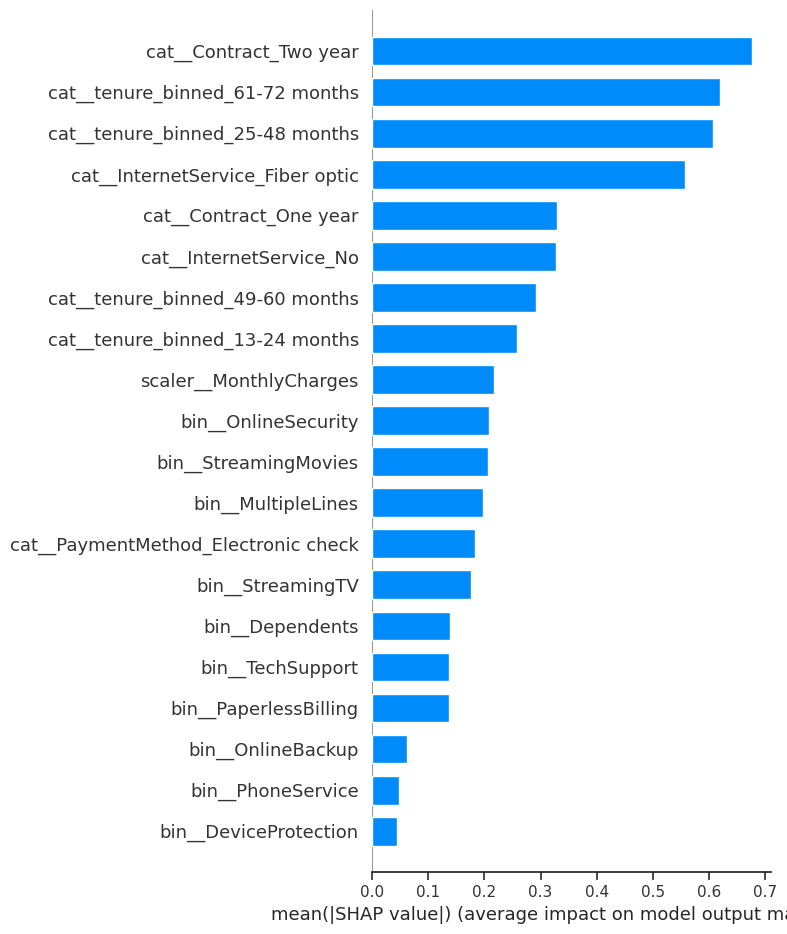

In [ ]:
# Bar plot of average SHAP values
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

1. **Demographic Factor**
	- *Gender*: This factor has a low impact on churn, indicating that churn risk is not significantly different between male and female customers. Therefore, gender-specific marketing strategies may not be necessary.
	-	*Dependents*: Customers with dependents are less likely to churn. This suggests that families or customers with dependents may be more loyal. Offering family-oriented bundles or packages could be an effective retention strategy.

2. **Customer Account Information**
	-	*Tenure*: Customers with longer tenure are less likely to churn, while those with shorter tenure (e.g., less than 12 months) are more likely to leave. This highlights the importance of providing a positive experience early on. Implementing a welcome program or loyalty incentives for new customers can help reduce early churn.
	-	*MonthlyCharges*: Higher monthly charges are associated with a higher likelihood of churn. This suggests that price sensitivity plays a role in churn. Offering discounts, flexible payment plans, or tiered pricing options may help retain high-paying customers.
	-	*Contract Type*: Customers with long-term contracts (e.g., two-year contracts) are less likely to churn compared to those with month-to-month contracts. Encouraging customers to switch to longer-term contracts with attractive incentives (such as discounts or value-added services) can reduce churn.

3. **Service Add-Ons**
	-	*Internet Service Type*: Customers using fiber optic internet have a higher likelihood of churn compared to those with other types of internet service. This could be due to price, performance issues, or competition. Addressing common complaints and providing service improvements for fiber optic users can help reduce churn.
	-	*Online Security*, Backup, and Tech Support: Customers who subscribe to these add-on services are less likely to churn, indicating that value-added services contribute to customer retention. Promoting these services as part of a package or upselling them to customers can increase retention.
	-	*Streaming Services (TV and Movies)*: Customers who use streaming services are more likely to stay. This suggests that providing additional entertainment options or promoting bundled packages with streaming services can help improve customer loyalty.
	-	P*aperless Billing*: Customers who opt for paperless billing are less likely to churn. Encouraging more customers to switch to paperless billing could be a low-cost strategy to improve retention.


## **8. Conclusion**

- From the six machine learning models tested, the process was narrowed down to four top-performing models, ultimately identifying **XGBoost** as the best model for predicting costumer churn. The model achieved an F2-score of **0.71**, Recall of **xx**, and Precision of **xx**, showcasing its accuracy and reliability in churn classification.
- The analysis highlighted the importance of a comprehensive approach, including data cleaning, EDA, and data preprocessing, to ensure data quality and usability. Additionally, hyperparameter tuning played a critical role in significantly improving the model’s performance, underlining its necessity in building effective predictive models.
- Among the features analyzed, Contract_Two year emerged as the most significant factor influencing customer churn. This finding highlights the dominant role of long-term contracts in retaining customers. This insight is crucial for developing customer retention strategies, as encouraging customers to commit to longer-term contracts with attractive incentives or benefits can significantly reduce churn rates and ensure stable revenue for the business.

## **9. Recommendation**

### **Business Recommendations**

#### **1. Encourage Long-Term Contracts**
**Insight:** Customers with **two-year contracts** are significantly less likely to churn. Long-term contracts create stability and reduce customer turnover.

**Recommendation:**
- Offer **discounted rates** or **loyalty rewards** for customers who switch from **month-to-month to annual contracts**.
- Bundle long-term contracts with **additional benefits** like free add-ons (e.g., security services or premium support).
- Implement a **contract renewal incentive program** to retain customers nearing the end of their current contracts.


#### **2. Improve Early Customer Experience**
**Insight:** Customers with a **tenure of less than 12 months** are at the highest risk of churn. Providing a **strong onboarding experience** can increase retention.

**Recommendation:**
- Develop a **"Welcome Program"** that includes:
  - A **personalized onboarding guide**.
  - **First-time user discounts** or **extended free trials** for premium services.
- Assign **customer success representatives** to new customers for the first three months.
- Implement **proactive outreach** via email, SMS, or calls to address potential issues early.


#### **3. Address Churn Among High-Paying Customers**
**Insight:** Customers with **higher monthly charges** have a **higher likelihood of churn**, indicating price sensitivity.

**Recommendation:**
- Introduce **tiered pricing options** to allow customers to downgrade instead of canceling.
- Provide **custom retention offers** for high-paying customers, such as discounts or bundled services.
- Offer **flexible payment plans** to customers flagged as high risk due to high charges.


#### **4. Reduce Churn Among Fiber Optic Customers**
**Insight:** Customers using **fiber optic internet** have a **higher churn rate** compared to those using other internet services. This suggests possible service issues or competitive pressure.

**Recommendation:**
- Conduct **customer satisfaction surveys** specifically for fiber optic users to identify common complaints.
- Improve **service reliability** by proactively monitoring and resolving fiber-related technical issues.
- Offer **exclusive discounts** or **speed upgrades** to retain fiber optic customers.


#### **5. Promote Service Add-Ons for Retention**
**Insight:** Customers with **Online Security, Tech Support, and Streaming Services** are **less likely to churn**. These services enhance value perception and improve loyalty.

**Recommendation:**
- Offer **bundled service packages** that include **Online Security, Backup, or Tech Support** at discounted rates.
- Run **targeted promotions** to upsell streaming services (TV & Movies) to existing customers.
- Provide **free trials** for security and tech support services, leading to higher adoption.



#### **6. Implement Family-Oriented Packages**
**Insight:** Customers with **dependents are less likely to churn**, suggesting that family-oriented services may improve retention.

**Recommendation:**
- Create **family-friendly bundles** that include discounts on multiple lines or additional services.
- Offer **exclusive promotions for customers with dependents**, such as parental controls or family streaming bundles.
- Develop a **"Loyalty for Families" program**, rewarding long-term customers with family-centric benefits.


#### **7. Optimize Billing Strategy**
**Insight:** Customers who opt for **paperless billing are less likely to churn**. Additionally, those using **electronic checks have higher churn**.

**Recommendation:**
- Encourage customers to switch to **paperless billing** through **discounts or rewards**.
- Promote **automatic payment options** like bank transfers or credit cards to reduce churn from electronic check users.
- Enhance the **digital billing experience** with user-friendly dashboards and proactive reminders.


#### **8. Proactive Churn Prevention with AI-Driven Alerts**
**Insight:** Machine learning models can predict churn-prone customers **before they leave**.

**Recommendation:**
- Implement **AI-driven churn prediction alerts** to **proactively reach out** to at-risk customers.
- Personalize retention offers based on the customer’s risk level (e.g., discounts, free add-ons, or service upgrades).
- Use **real-time analytics** to track customer dissatisfaction signals and trigger interventions.

### **Recommendations for Future Improvements**

**1. Data Improvements:**

- Explore advanced sampling techniques beyond SMOTE for handling the imbalances dataset.
- Optimize feature engineering by creating additional features that may capture customer behaviour more effectively.

**2. Model Improvements:**
- Experiment with different classification algorithm (e.g., Support Vector Machine, CatBoost, etc.)
- Experiment with ensemble techniques, combining multiple models for better performance.